In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
from collections.abc import Callable

### <font color = green|><b>Euluer Method 

In [2]:
pd.options.display.float_format = '{:.8f}'.format

def EuluerMethod(a:float,
                 b:float,
                 n:int,
                 alpha:float,
                 f:callable)->pd.DataFrame:
    
    h = (b-a)/n     
    t = np.linspace(start=a,stop=b,num=n+1,dtype=np.float64)
    w = np.full_like(a=t,fill_value=np.nan,dtype=np.float64)
    
    w[0] = alpha 
    
    for i in range(0,n,1):
        w[i+1] = w[i] + h*f(t[i],w[i])
    df = pd.DataFrame(data={'t':t,'w':w},dtype=np.float64)
    return df 

if __name__ == '__main__':
    
    def f(t:float,y:float)->float:
        return y - t**2 + 1 # y - t^2 + 1 
    
    (a,b) = (0,2)
    alpha = 0.5 
    n = 100 
    df = EuluerMethod(a=a,b=b,alpha=alpha,n=n,f=f)
    
    def y(t:float)->float:
        return (t+1)**2 - np.exp(t)/2  
    
    df['y'] = df['t'].apply(func=y)
    df['|y-w|'] = abs(df['y']-df['w'])
    print(df)
    df.style.format(precision=8).to_latex("EuleurMethod.tex")

             t          w          y      |y-w|
0   0.00000000 0.50000000 0.50000000 0.00000000
1   0.02000000 0.53000000 0.53029933 0.00029933
2   0.04000000 0.56059200 0.56119461 0.00060261
3   0.06000000 0.59177184 0.59268173 0.00090989
4   0.08000000 0.62353528 0.62475647 0.00122119
..         ...        ...        ...        ...
96  1.92000000 5.06607475 5.11592077 0.04984602
97  1.94000000 5.11366824 5.16422451 0.05055627
98  1.96000000 5.16066961 5.21193647 0.05126686
99  1.98000000 5.20705100 5.25902851 0.05197751
100 2.00000000 5.25278402 5.30547195 0.05268793

[101 rows x 4 columns]


In [3]:
df.head(30)

,t,w,y,|y-w|
0,0.00000000,0.50000000,0.50000000,0.00000000
1,0.02000000,0.53000000,0.53029933,0.00029933
2,0.04000000,0.56059200,0.56119461,0.00060261
3,0.06000000,0.59177184,0.59268173,0.00090989
4,0.08000000,0.62353528,0.62475647,0.00122119
5,0.10000000,0.65587798,0.65741454,0.00153656
6,0.12000000,0.68879554,0.69065157,0.00185603
7,0.14000000,0.72228345,0.72446310,0.00217965
8,0.16000000,0.75633712,0.75884456,0.00250744
9,0.18000000,0.79095186,0.79379132,0.00283945


            t          y      exact      error
0  0.00000000 0.50000000 0.50000000 0.00000000
1  0.20000000 0.80000000 0.82929862 0.02929862
2  0.40000000 1.15200000 1.21408765 0.06208765
3  0.60000000 1.55040000 1.64894060 0.09854060
4  0.80000000 1.98848000 2.12722954 0.13874954
5  1.00000000 2.45817600 2.64085909 0.18268309
6  1.20000000 2.94981120 3.17994154 0.23013034
7  1.40000000 3.45177344 3.73240002 0.28062658
8  1.60000000 3.95012813 4.28348379 0.33335566
9  1.80000000 4.42815375 4.81517627 0.38702251
10 2.00000000 4.86578450 5.30547195 0.43968745


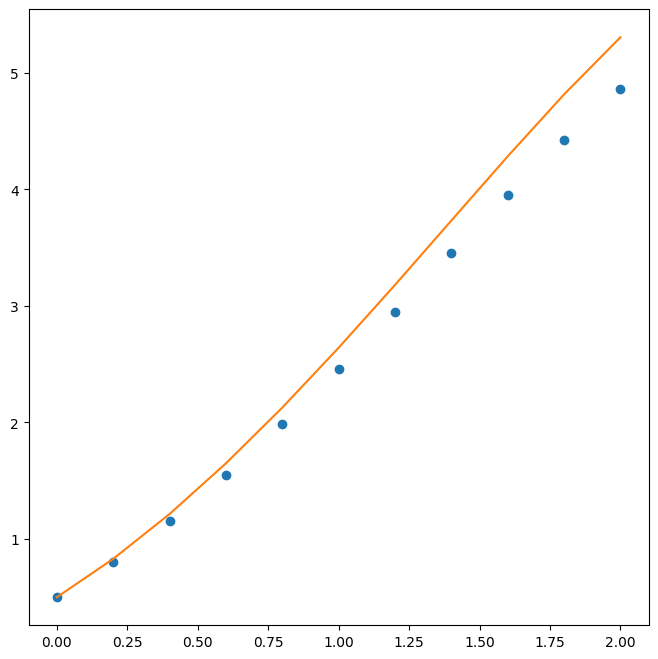

In [4]:
def EuluerMethod2(f:Callable[[float,float],float],
                  t_span:list or tuple or np.ndarray,
                  y_init:float or np.float64,
                  n:int or np.float64)->pd.DataFrame:
    
    h = (t_span[1] - t_span[0])/n 
    t = np.linspace(start=t_span[0], stop = t_span[1], num = n+1, dtype=np.float64)
    y = np.full_like(a=t, fill_value=np.nan, dtype=np.float64)
    y[0] = y_init
    
    for i in range(0, n, 1):
        y[i+1] = y[i] + h*f(t[i],y[i])
        
    df = pd.DataFrame(data={"t": t, "y":y}, dtype=np.float64)
    return df


if __name__=="__main__":
    
    def f(t:float,y:float)->float:
        return y-t**2+1

    (a,b)=(0,2)
    alpha=0.5
    n=10

    df= EuluerMethod2(f=f, t_span=[a,b], y_init=alpha, n=n)

    def y(t: float)-> float:
        return (t+1)**2 - np.exp(t)/2

    df['exact']=df['t'].apply(func=y)
    df['error']= abs(df['exact']-df['y'])
    print(df)

    fig = plt. figure(figsize=(8, 8))
    ax = fig.add_subplot (1, 1, 1)
    ax.plot(df["t"], df["y"], 'o') 
    ax.plot (df["t"], df["exact"],'-')

    plt.show()

### <font color = green|><b>Runge-Kutta Method of Order 4 (Classic)

              t            y        exact        error
0  1.0000000000 0.0000000000 0.0000000000 0.0000000000
1  1.1000000000 0.0411035226 0.0411044424 0.0000009198
2  1.2000000000 0.0628932957 0.0628945147 0.0000012190
3  1.3000000000 0.0722396827 0.0722409471 0.0000012644
4  1.4000000000 0.0734573356 0.0734585435 0.0000012079
5  1.5000000000 0.0693428861 0.0693440008 0.0000011147
6  1.6000000000 0.0617578223 0.0617588352 0.0000010130
7  1.7000000000 0.0519692671 0.0519701819 0.0000009148
8  1.8000000000 0.0408561648 0.0408569895 0.0000008247
9  1.9000000000 0.0290377885 0.0290385327 0.0000007441
10 2.0000000000 0.0169559377 0.0169566105 0.0000006728


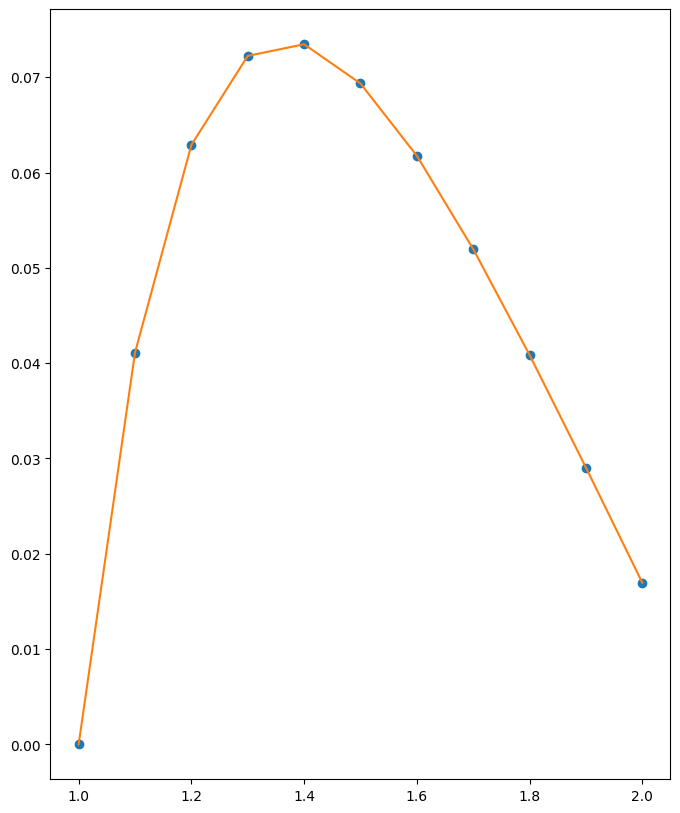

In [5]:
from collections.abc import Callable

def RungKutta40(f:Callable[[np.float64,np.float64],np.float64],t_span:np.ndarray,y_int:np.float64,n:np.int64)->pd.DataFrame:
    h = (t_span[1]-t_span[0])/n     
    t = np.linspace(start=t_span[0],stop=t_span[1],num=n+1,dtype=np.float64)
    y = np.full_like(a=t,fill_value=np.nan,dtype=np.float64)
    y[0] = y_int 
    
    for i in range(0,n,1):
        k1 = f(t[i],y[i])
        k2 = f(t[i] + 0.5*h , y[i] + 0.5*h*k1)
        k3 = f(t[i] + 0.5*h , y[i] + 0.5*h*k2)
        k4 = f(t[i] + h , y[i] + h*k3)
        
        y[i+1] = y[i] + h*(k1 + 2.0*k2 + 2.0*k3 + k4)/6.0 
    df = pd.DataFrame(data={'t':t,'y':y},dtype=np.float64)
    return df 

if __name__ == '__main__':
    def f(t:np.float64,y:np.float64)->np.float64:
        return t**(-2) * (np.cos(t) - 2*t*y)
    t_span = np.array(object=[1,2],dtype=np.float64)
    y_init = 0.0 
    n = 10 
    df = RungKutta40(f=f,t_span=t_span,y_int=y_init,n=n)
    
    def y(t:np.float64)->np.float64:
        return t**(-2) * (np.sin(t) - np.sin(1))
    
    df.loc[:,'exact'] = df.loc[:,'t'].apply(func=y)
    df.loc[:,'error'] = abs(df.loc[:,'y']-df.loc[:,'exact'])
    pd.options.display.float_format = '{:.10f}'.format
    
    print(df)
    
    fig = plt.figure(figsize=(8,10))
    ax = fig.add_subplot(1,1,1)
    ax.plot(df.loc[:,'t'],df.loc[:,'y'],'o')
    ax.plot(df.loc[:,'t'],df.loc[:,'exact'],'-')
    plt.show()

### <font color = green|><b>Runge-Kutta Method of Order 4 (Using Butcher Table)

              t            y        exact        error
0  1.0000000000 0.0000000000 0.0000000000 0.0000000000
1  1.1000000000 0.0411035226 0.0411044424 0.0000009198
2  1.2000000000 0.0628932957 0.0628945147 0.0000012190
3  1.3000000000 0.0722396827 0.0722409471 0.0000012644
4  1.4000000000 0.0734573356 0.0734585435 0.0000012079
5  1.5000000000 0.0693428861 0.0693440008 0.0000011147
6  1.6000000000 0.0617578223 0.0617588352 0.0000010130
7  1.7000000000 0.0519692671 0.0519701819 0.0000009148
8  1.8000000000 0.0408561648 0.0408569895 0.0000008247
9  1.9000000000 0.0290377885 0.0290385327 0.0000007441
10 2.0000000000 0.0169559377 0.0169566105 0.0000006728


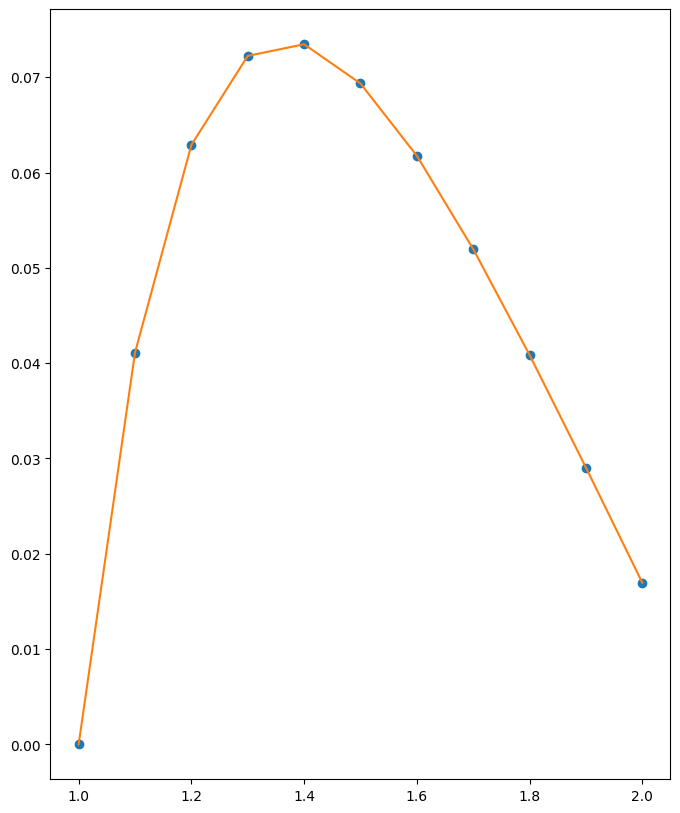

In [6]:
from collections.abc import Callable

def RungKutta41(f:Callable[[np.float64,np.float64],np.float64],
                t_span:np.ndarray,
                y_int:np.float64,
                n:np.int64)->pd.DataFrame:
    
    h = (t_span[1]-t_span[0])/n     
    t = np.linspace(start=t_span[0],stop=t_span[1],num=n+1,dtype=np.float64)
    y = np.full_like(a=t,fill_value=np.nan,dtype=np.float64)
    y[0] = y_int 
    
    # Butcher table 
    c = np.array(object=[0,1/2,1/2,1],dtype=np.float64)
    
    a = np.array(object=[[0,0,0,0],
                         [1/2,0,0,0],
                         [0,1/2,0,0],
                         [0,0,1,0]],dtype= np.float64)
    
    b = np.array(object=[1/6,1/3,1/3,1/6],dtype=np.float64)
    
    for i in range(0,n,1):
        k1 = f(t[i],y[i])
        k2 = f(t[i] + 0.5*h , y[i] + 0.5*h*k1)
        k3 = f(t[i] + 0.5*h , y[i] + 0.5*h*k2)
        k4 = f(t[i] + h , y[i] + h*k3)
        
        y[i+1] = y[i] + h*(k1 + 2.0*k2 + 2.0*k3 + k4)/6.0 
    df = pd.DataFrame(data={'t':t,'y':y},dtype=np.float64)
    return df 


if __name__ == '__main__':
    
    def f(t:np.float64,y:np.float64)->np.float64:
        return t**(-2) * (np.cos(t) - 2*t*y)
    t_span = np.array(object=[1,2],dtype=np.float64)
    y_init = 0.0 
    n = 10 
    df = RungKutta41(f=f,t_span=t_span,y_int=y_init,n=n)
    
    def y(t:np.float64)->np.float64:
        return t**(-2) * (np.sin(t) - np.sin(1))
    
    df.loc[:,'exact'] = df.loc[:,'t'].apply(func=y)
    df.loc[:,'error'] = abs(df.loc[:,'y'] - df.loc[:,'exact'])
    pd.options.display.float_format = '{:.10f}'.format
    
    print(df)
    
    fig = plt.figure(figsize=(8,10))
    ax = fig.add_subplot(1,1,1)
    ax.plot(df.loc[:,'t'],df.loc[:,'y'],'o')
    ax.plot(df.loc[:,'t'],df.loc[:,'exact'],'-')
    plt.show()

### <font color = green|><b>Runge-Kutta Method of Order 4 (Classic)

:( At i = 0, h_i = 5.6474860953386724e-05 < h_min = 0.0001)
             t     h            y        exact        error
0 1.0000000000  None 0.0000000000 0.0000000000 0.0000000000


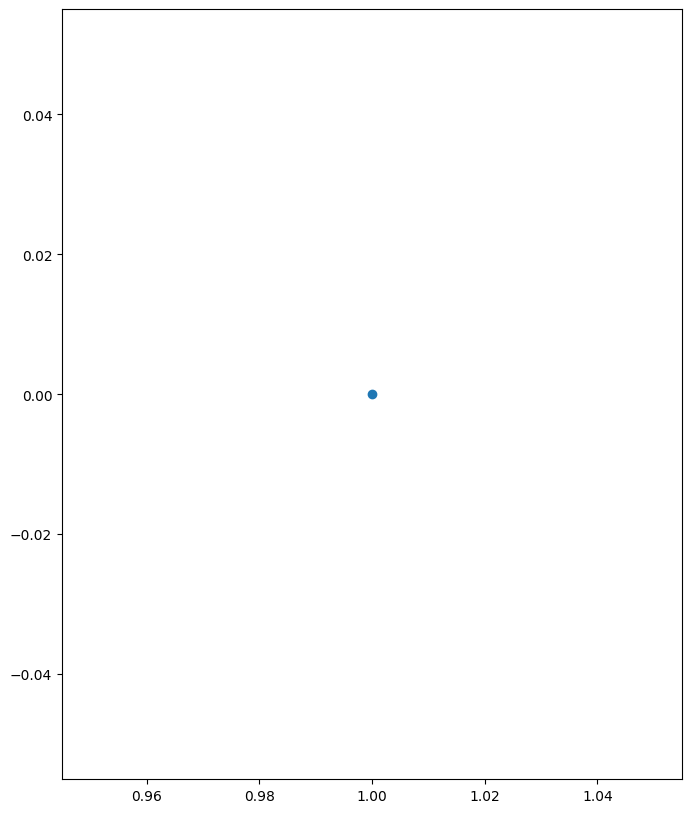

In [7]:
from collections.abc import Callable
from typing import Optional

def RungKuttaFehberg45(f:Callable[[np.float64,np.float64],np.float64],
                       t_span:np.ndarray,
                       y_int:np.float64,
                       h_max:Optional[np.float64]=2.5e-1,
                       h_min:Optional[np.float64]=1.e-4,
                       tol:Optional[np.float64]=1.e-10)->pd.DataFrame:
    
    t = t_span[0]   
    y = y_init
    h = h_max
    i = 0
    
    df = pd.DataFrame(data={'t':t,'h':[None],'y':[y]})
    
    # TODO : Butcher tableau of Rung-Kutta-Fehlberg of order 4 and 5 
    c = np.array(object=[0,1/4,3/8,12/13,1,1/2],dtype=np.float64)
    
    a = np.array(object=[[0,0,0,0,0],
                         [1/4,0,0,0,0],
                         [3/32,9/32,0,0,0],
                         [1932/2197,-7200/2197,7296/2197,0,0],
                         [439/216,-8,3680/513,-845/4140,0],
                         [-8/27,2,-3544/2565,1859/4140,-11/40]],dtype= np.float64)
    
    b = np.array(object=[25/216,0,1408/2565,2197/4140,-1/5],dtype=np.float64)
    # bp = np.array(object=[25/216,0,1408/2565,2197/4140,-1/5,0],dtype=np.float64)
    # db = b - bp 
    db = np.array(object=[1/360,0,-128/4275,-2197/75240,1/50,2/55],dtype=np.float64)
    
    flag = 1 
    while flag:
        k0 = f(t,y)
        k1 = f(t+c[1]*h , y+(a[1,0]*k0)*h)
        k2 = f(t+c[2]*h , y+(a[2,0]*k0 + a[2,1]*k1)*h)
        k3 = f(t+c[3]*h , y+(a[3,0]*k0 + a[3,1]*k1 + a[3,2]*k2)*h)
        k4 = f(t+c[4]*h , y+(a[4,0]*k0 + a[4,1]*k1 + a[4,2]*k2 + a[4,3]*k3)*h)
        k5 = f(t+c[5]*h , y+(a[5,0]*k0 + a[5,1]*k1 + a[5,2]*k2 + a[5,3]*k3 + a[5,4]*k4)*h)
        r = abs(db[0]*k0 + db[1]*k1 + db[2]*k2 + db[3]*k3 + db[4]*k4 + db[5]*k5)
    
        # TODO: Check if the truncation error r is acceptable
        if r <= tol:
            t = t+h
            y = y + (b[0]*k0 + b[1]*k1 + b[2]*k2 + b[3]*k3 + b[4]*k4) * h
            i += 1 
            df.loc[i,:] = [t,h,y]
        d = 0.84*(tol/r) ** (1/4)
        
        # TODO: Control the factor d by 0.1 <= h_new / h_old <= 4.0 
        if d<0.1:
            d = 0.1 
        elif d>4:
            d = 4.0 
        h = d*h 
        
        # TODO: Control h with constraint h <= h_max 
        if h>h_max:
            h = h_max
            
        # TODO: Check if last step reached 
        if t>=t_span[1]:
            flag = 0 
            print(f':) Successfully completed with {i} steps!')
        elif t+h>t_span[1]:
            h = t_span[1] - t
            
        # TODO: Check if h is too small 
        elif h < h_min:
            flag = 0 
            print(f':( At i = {i}, h_i = {h} < h_min = {h_min})')
            
    return df 


if __name__ == '__main__':
    
    def f(t:np.float64,y:np.float64)->np.float64:
        return t**(-2) * (np.cos(t) - 2*t*y)
    
    t_span = np.array(object=[1,2],dtype=np.float64)
    y_init = 0.0 
    n = 10 
    
    df = RungKuttaFehberg45(f=f,t_span=t_span,y_int=y_init)
    
    def y(t:np.float64)->np.float64:
        return t**(-2) * (np.sin(t) - np.sin(1))
    
    df.loc[:,'exact'] = df.loc[:,'t'].apply(func=y)
    df.loc[:,'error'] = abs(df.loc[:,'y'] - df.loc[:,'exact'])
    pd.options.display.float_format = '{:.10f}'.format
    
    print(df)
    
    fig = plt.figure(figsize=(8,10))
    ax = fig.add_subplot(1,1,1)
    ax.plot(df.loc[:,'t'],df.loc[:,'y'],'o')
    ax.plot(df.loc[:,'t'],df.loc[:,'exact'],'-')
    plt.show()

### <font color = green|><b>Adams Predictor Corrector

              t                y            exact           error
0  2.0000000000     0.5000000000     5.3054719505    4.8054719505
1  2.7000000000    -3.4169535417     6.2501341376    9.6670876792
2  3.4000000000   -15.0656144221     4.3779499763   19.4435643984
3  4.1000000000   -43.2637187180    -4.1601437987   39.1035749193
4  4.8000000000  -105.5662169141   -27.1152087594   78.4510081547
5  5.5000000000  -237.4429425127   -80.0959661321  157.3469763806
6  6.2000000000  -510.1351197455  -194.5345205466  315.6005991989
7  6.9000000000 -1066.7458779073  -433.7273578025  633.0185201048
8  7.6000000000 -2194.8082230523  -925.1379475521 1269.6702755002
9  8.3000000000 -4472.0556404489 -1925.4461969112 2546.6094435378
10 9.0000000000 -9059.3046170288 -3951.5419637877 5107.7626532411


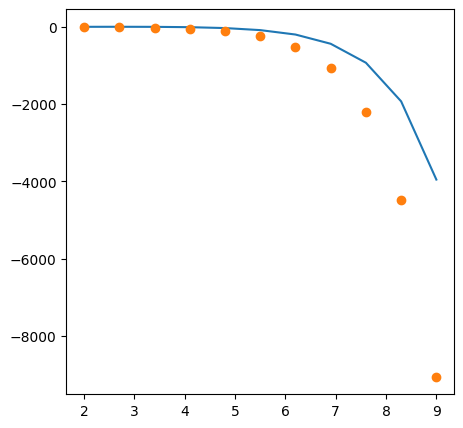

In [8]:
def Adams_Predictor_Corrector(f: Callable[[np.float64, np.float64], np.float64],
                              t_span: list or tuple or np.ndarray,
                              y_init: float or np.float64,
                              n: int or np.int64) -> pd.DataFrame:

    h = (t_span[1] - t_span[0]) / n
    t = np.linspace(start=t_span[0], stop=t_span[1], num=n + 1, dtype=np.float64)
    y = np.full_like(a=t, fill_value=np.nan, dtype=np.float64)
    y[0] = y_init

    # TODO: y[0], y[1], and y[2] using one-step, Runge-Kutta method of order four
    for i in range(0, 3, 1):
        k1 = f(t[i], y[i])
        k2 = f(t[i] + 0.5 * h, y[i] + 0.5 * h * k1)
        k3 = f(t[i] + 0.5 * h, y[i] + 0.5 * h * k2)
        k4 = f(t[i] + h, y[i] + h * k3) 
        
        y[i + 1] = y[i] + h * (k1 + 2.0 * k2 + 2.0 * k3 + k4) / 6.0
        t[i + 1] = t[i] + h

    # TODO: apply predictor corrector method
    for i in range(3, n, 1):
        
        # TODO: predictor
        yp = y[i] + h * (55 * f(t[i], y[i]) - 59 * f(t[i - 1], y[i - 1]) + 37 * f(t[i - 2], y[i - 2]) - 9 * f(t[i - 3], y[i - 3])) / 24
       
        # TODO: corrector
        y[i + 1] = y[i] + h * (9 * f(t[i + 1], yp) + 19 * f(t[i], y[i]) - 5 * f(t[i - 1], y[i - 1]) + f(t[i - 2], y[i - 2])) / 24

    df = pd.DataFrame(data={'t': t, 'y': y}, dtype=np.float64)
    return df


if __name__ == '__main__':
    
    def f(t: float, y: float) -> float:
        return y - t ** 2 + 1

    df = Adams_Predictor_Corrector(f=f, t_span=[2, 9], y_init=0.5, n=10)

    def y(t):
        return (t + 1) ** 2 - 0.5 * np.exp(t)

    df.loc[:, 'exact'] = df.loc[:, 't'].apply(y)
    df.loc[:, 'error'] = abs(df.loc[:, 'y'] - df.loc[:, 'exact'])
    print(df)

    fig = plt.figure(figsize=(5, 5))
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(df['t'], df['exact'], '-')
    ax.plot(df['t'], df['y'], 'o')
    plt.show()

              t            y
0  0.0000000000 1.0000000000
1  0.1000000000 1.1885286783
2  0.2000000000 1.3466967672
3  0.3000000000 1.4682519391
4  0.4000000000 1.5516631535
5  0.5000000000 1.5994030303
6  0.6000000000 1.6165262856
7  0.7000000000 1.6091899151
8  0.8000000000 1.5835222848
9  0.9000000000 1.5449545089
10 1.0000000000 1.4979413078


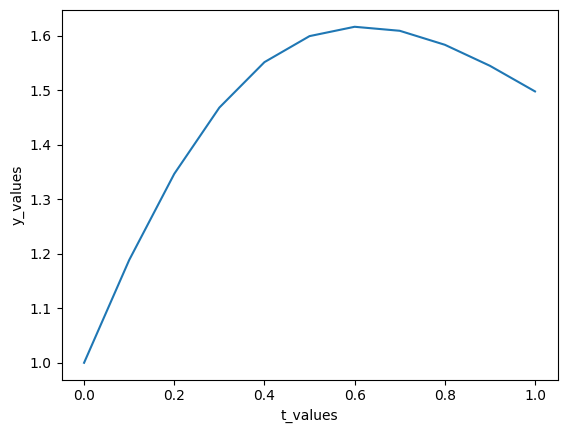

In [9]:
def RungeKutta2(f:Callable [[float,float],float],
                t_span: list or tuple,
                y_init: float,
                n:int)->pd.DataFrame:
    
    (a,b) =t_span
    h=(b-a)/n
    
    t= np.linspace(start=a, stop=b, num=n+1,dtype= np.float64)
    y= np.full_like(a=t, fill_value=np.nan, dtype=np.float64)
    y[0]=y_init
    
    c=np.array(object=[0,1/2], dtype=np.float64)
    a=np.array(object=[[0,0],[1/2,0]],dtype=np.float64)
    b=np.array(object=[0,1],dtype= np.float64)

    for i in range(0,n,1):
        k0= f(t[i],y[i])
        k1= f(t[i]+c[1]*h, y[i]+(a[1,0]*k0)*h)
        y[i+1]= y[i] + h*(b[0]*k0 + b[1]*k1)

    df =pd.DataFrame(data={"t":t,"y":y})
    return df

if __name__ == "__main__":
    
    def f(t,y): 
        return 2.0*(1-t*y)/(t**2.0 + 1.0)
    
    t_span = [0.0, 1.0]
    y_init = 1.0
    n =10
    
    df = RungeKutta2(f=f, t_span=t_span, y_init=y_init, n=n)
    print(df)
    
    plt.plot(df['t'],df['y'])
    plt.xlabel('t_values')
    plt.ylabel('y_values')
    plt.show()

In [10]:
from collections.abc import Callable
from typing import Literal
from typing import Optional
import pandas as pd
import numpy as np

def Rungekutta2(f:Callable[[float,float],float],
                t_span: list or tuple,
                y_init:float,
                n:int,
                method:Optional[Literal["Midpoint","Heun","Ralston"]])-> pd.DataFrame:

    print("{method} method is used ")
    (a,b) = t_span
    h=(b-a)/n
    
    t = np.linspace(start=a,stop=b,num=n+1, dtype=np.float64)
    y = np.full_like(a=t,fill_value=np.nan,dtype=np.float64)
    
    y[0]=y_init

    if method == "Midpoint":
        c = np.array([0.0,1.0/2.0],dtype = np.float64)
        a = np.array(object= [[0, 0],
                         [1/2,0]],
                dtype=np.float64)
        b = np.array(object=[0,1],dtype = np.float64)
    
    elif method=="Heun":
        c = np.array([0,1],dtype = np.float64)
        a = np.array(object= [[0, 0],
                         [1,0]],
                dtype=np.float64)
        b = np.array(object=[0,1],dtype = np.float64)
    
    else:
        c = np.array([0.0,2/3],dtype = np.float64)
        a = np.array(object= [[0, 0],
                         [2/3,0]],
                dtype=np.float64)
        b = np.array(object=[1/4,3/4],dtype = np.float64)
   
    for i in range(0,n,1):
        k0= f(t[i],y[i])
        k1= f(t[i]+c[1]*h, y[i]+(a[1,0]*k0)*h)
        y[i+1]=y[i]+ h*(b[0]*k0 + b[1]*k1)  

    df = pd.DataFrame(data={"t":t, "y":y})
    return df


if __name__=="__main__":
    
    def f(t:float,y:float): 
        return 2.0 * (1-t*y) / (t**2.0+ 1.0)
    
    t_span = [0.0, 1.0]
    y_init = 1.0
    n=10
    
    methods=["Midpoint","Heun","Ralston"]
    
    def y(t:float)-> float:
        return (2.0*t + 1.0)/(t**2.0 + 1.0)
    
    t = np.linspace(start=t_span[0], stop=t_span[1], num = n+1,dtype=np.float64) 
    df = pd.DataFrame(data = {"t": t})
    df["exact"] = df["t"].apply(func=y)
    
    for method in methods:
        dfi = Rungekutta2(f=f,t_span=t_span,y_init=y_init,n=n,method=method)
        df = pd.concat(objs= [df, dfi["y"]],axis=1)
        df[f"e_{method}"] = abs(df["exact"] - df["y"])
        df.rename(columns={"y": f"y_{method}"}, inplace=True)
    #   df["exact"]=df["t"].apply(func=y)
    #   df["error"]=abs(df["exact"]-df["y"]) 

{method} method is used 
{method} method is used 
{method} method is used 


In [11]:
df

,t,exact,y_Midpoint,e_Midpoint,y_Heun,e_Heun,y_Ralston,e_Ralston
0,0.0000000000,1.0000000000,1.0000000000,0.0000000000,1.0000000000,0.0000000000,1.0000000000,0.0000000000
1,0.1000000000,1.1881188119,1.1885286783,0.0004098664,1.1742574257,0.0138613861,1.1880530973,0.0000657145
2,0.2000000000,1.3461538462,1.3466967672,0.0005429211,1.3146795563,0.0314742899,1.3458943216,0.0002595246
3,0.3000000000,1.4678899083,1.4682519391,0.0003620308,1.4179957407,0.0498941676,1.4673108491,0.0005790591
4,0.4000000000,1.5517241379,1.5516631535,0.0000609844,1.4853455912,0.0663785467,1.5507554420,0.0009686959
5,0.5000000000,1.6000000000,1.5994030303,0.0005969697,1.5209198506,0.0790801494,1.5986480698,0.0013519302
6,0.6000000000,1.6176470588,1.6165262856,0.0011207733,1.5303981216,0.0872489373,1.6159820107,0.0016650481
7,0.7000000000,1.6107382550,1.6091899151,0.0015483399,1.5197007696,0.0910374854,1.6088641226,0.0018741324
8,0.8000000000,1.5853658537,1.5835222848,0.0018435689,1.4942238642,0.0911419895,1.5833914392,0.0019744145
9,0.9000000000,1.5469613260,1.5449545089,0.0020068170,1.4584937613,0.0884675647,1.5449808983,0.0019804277


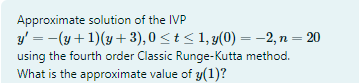 
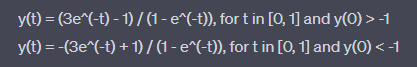

              t             y          exact         error
0  0.0000000000 -2.0000000000           -inf           inf
1  0.0500000000 -1.9500416276 -79.0166659723 77.0666243446
2  0.1000000000 -1.9003320107 -39.0333277791 37.1329957684
3  0.1500000000 -1.8511149745 -25.7166479267 23.8655329522
4  0.2000000000 -1.8026246910 -19.0666222645 17.2639975735
5  0.2500000000 -1.7550813522 -15.0832466568 13.3281653046
6  0.3000000000 -1.7086874059 -12.4331836540 10.7244962482
7  0.3500000000 -1.6636244781 -10.5450005934  8.8813761153
8  0.4000000000 -1.6200510647  -9.1329791269  7.5129280622
9  0.4500000000 -1.5781010265  -8.0383850674  6.4602840409
10 0.5000000000 -1.5378828797  -7.1659763301  5.6280934504
11 0.5500000000 -1.4994798312  -6.4551429077  4.9556630765
12 0.6000000000 -1.4629504810  -5.8654768606  4.4025263796
13 0.6500000000 -1.4283300876  -5.3690023134  3.9406722258
14 0.7000000000 -1.3956322822  -4.9457354545  3.5501031723
15 0.7500000000 -1.3648511125  -4.5810205376  3.21616942

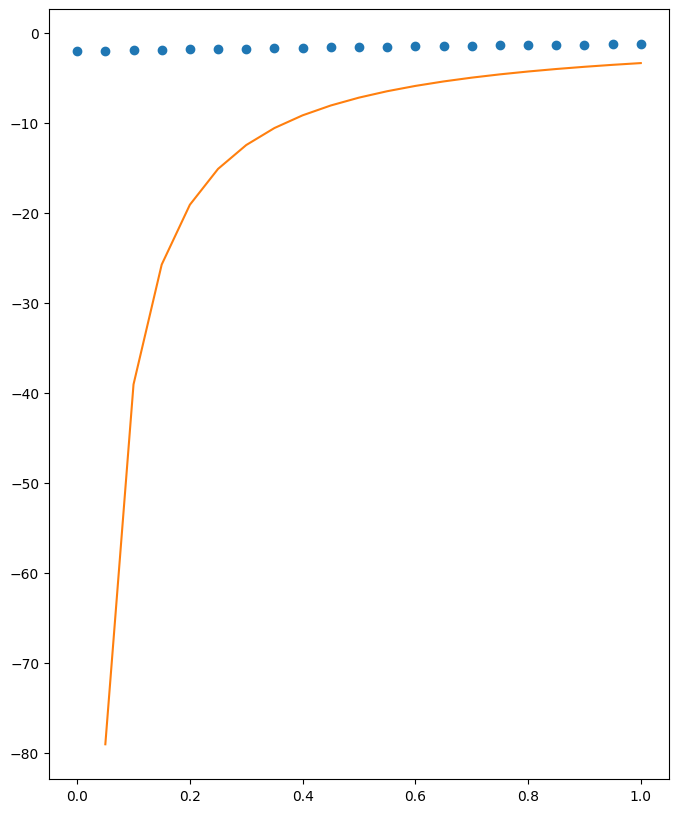

In [32]:
from collections.abc import Callable

def RungKutta40(f:Callable[[np.float64,np.float64],np.float64],t_span:np.ndarray,y_int:np.float64,n:np.int64)->pd.DataFrame:
    
    h = (t_span[1]-t_span[0])/n     
    t = np.linspace(start=t_span[0],stop=t_span[1],num=n+1,dtype=np.float64)
    y = np.full_like(a=t,fill_value=np.nan,dtype=np.float64)
    y[0] = y_int 
    
    for i in range(0,n,1):
        k1 = f(t[i],y[i])
        k2 = f(t[i] + 0.5*h , y[i] + 0.5*h*k1)
        k3 = f(t[i] + 0.5*h , y[i] + 0.5*h*k2)
        k4 = f(t[i] + h , y[i] + h*k3)
        
        y[i+1] = y[i] + h*(k1 + 2.0*k2 + 2.0*k3 + k4)/6.0 
    df = pd.DataFrame(data={'t':t,'y':y},dtype=np.float64)
    return df 


if __name__ == '__main__':
    
    def f(t:np.float64,y:np.float64)->np.float64:
        return -(y+1)*(y+3) 
    
    t_span = np.array(object=[0,1],dtype=np.float64)
    y_init = -2
    n = 20
    df = RungKutta40(f=f,t_span=t_span,y_int=y_init,n=n)
    
    def y(t:np.float64)->np.float64:
        return -(3*np.exp(-t) + 1) / (1 - np.exp(-t))
    
    df.loc[:,'exact'] = df.loc[:,'t'].apply(func=y)
    df.loc[:,'error'] = abs(df.loc[:,'y']-df.loc[:,'exact'])
    pd.options.display.float_format = '{:.10f}'.format
    
    print(df)
    
    fig = plt.figure(figsize=(8,10))
    ax = fig.add_subplot(1,1,1)
    ax.plot(df.loc[:,'t'],df.loc[:,'y'],'o')
    ax.plot(df.loc[:,'t'],df.loc[:,'exact'],'-')
    plt.show()

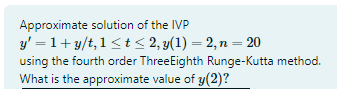

In [ ]:
from collections.abc import Callable

def RungKutta40(f:Callable[[np.float64,np.float64],np.float64],t_span:np.ndarray,y_int:np.float64,n:np.int64)->pd.DataFrame:
    
    h = (t_span[1]-t_span[0])/n     
    t = np.linspace(start=t_span[0],stop=t_span[1],num=n+1,dtype=np.float64)
    y = np.full_like(a=t,fill_value=np.nan,dtype=np.float64)
    y[0] = y_int 
    
    for i in range(0,n,1):
        k1 = f(t[i],y[i])
        k2 = f(t[i] + 0.5*h , y[i] + 0.5*h*k1)
        k3 = f(t[i] + 0.5*h , y[i] + 0.5*h*k2)
        k4 = f(t[i] + h , y[i] + h*k3)
        
        y[i+1] = y[i] + h*(k1 + 2.0*k2 + 2.0*k3 + k4)/6.0 
    df = pd.DataFrame(data={'t':t,'y':y},dtype=np.float64)
    return df 


if __name__ == '__main__':
    
    def f(t:np.float64,y:np.float64)->np.float64:
        return -(y+1)*(y+3) 
    
    t_span = np.array(object=[0,1],dtype=np.float64)
    y_init = -2
    n = 20
    df = RungKutta40(f=f,t_span=t_span,y_int=y_init,n=n)
    
    def y(t:np.float64)->np.float64:
        return -(3*np.exp(-t) + 1) / (1 - np.exp(-t))
    
    df.loc[:,'exact'] = df.loc[:,'t'].apply(func=y)
    df.loc[:,'error'] = abs(df.loc[:,'y']-df.loc[:,'exact'])
    pd.options.display.float_format = '{:.10f}'.format
    
    print(df)
    
    fig = plt.figure(figsize=(8,10))
    ax = fig.add_subplot(1,1,1)
    ax.plot(df.loc[:,'t'],df.loc[:,'y'],'o')
    ax.plot(df.loc[:,'t'],df.loc[:,'exact'],'-')
    plt.show()

In [35]:
def f(t, y):
    return 1 + y / t

t_list = []
y_list = []

def three_eighth_runge_kutta(t0, y0, h, n):
    t_current = t0
    y_current = y0

    for i in range(n):
        k1 = h * f(t_current, y_current)
        k2 = h * f(t_current + h / 3, y_current + k1 / 3)
        k3 = h * f(t_current + 2 * h / 3, y_current - k1 / 3 + k2)
        k4 = h * f(t_current + h, y_current + k1 - k2 + k3)

        y_current = y_current + (k1 + 3 * (k2 + k3) + k4) / 8
        t_current += h
        
        t_list.append(t_current)
        y_list.append(y_current)
        df = pd.DataFrame({'t':t_list,'y':y_list})

    print(df)
    return y_current

if __name__ == "__main__":
    t0 = 1
    y0 = 2
    n = 20
    h = (2 - t0) / n

    y_approx = three_eighth_runge_kutta(t0, y0, h, n)

    print("Approximate value of y(2): {:.10f}".format(y_approx))

              t            y
0  1.0500000000 2.1512296656
1  1.1000000000 2.3048411851
2  1.1500000000 2.4607262157
3  1.2000000000 2.6187858454
4  1.2500000000 2.7789294122
5  1.3000000000 2.9410735129
6  1.3500000000 3.1051411653
7  1.4000000000 3.2710610934
8  1.4500000000 3.4387671157
9  1.5000000000 3.6081976181
10 1.5500000000 3.7792950960
11 1.6000000000 3.9520057571
12 1.6500000000 4.1262791727
13 1.7000000000 4.3020679720
14 1.7500000000 4.4793275716
15 1.8000000000 4.6580159371
16 1.8500000000 4.8380933703
17 1.9000000000 5.0195223194
18 1.9500000000 5.2022672100
19 2.0000000000 5.3862942924
Approximate value of y(2): 5.3862942924


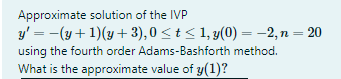

In [52]:
#Adam bashforth*
import numpy as np
from math import  cos

def f(t,y):
    return -(y+1)*(y+3) 
a,b,n = 0,1,20
h = (b-a)/n

t = np.linspace(a,b,n+1)
y = np.zeros(n+1)
y[0] = -2

for i in range(3):
    k1 = h*f(t[i],y[i])
    k2 = h*f(t[i]+h/2,y[i]+k1/2)
    k3 = h*f(t[i]+h/2,y[i]+k2/2)
    k4 = h*f(t[i]+h,y[i]+k3)
    y[i+1] = y[i] + (k1 + 2*k2 + 2*k3 + k4)/6

for i in range(3,n):
    y[i+1] = y[i] + h/24*(55*f(t[i],y[i])-59*f(t[i-1],y[i-1])+37*f(t[i-2],y[i-2])-9*f(t[i-3],y[i-3]))
    print(np.round(y[i+1],10))

-1.802626284
-1.7550842995
-1.708691473
-1.6636293549
-1.6200564325
-1.5781065677
-1.5378882987
-1.4994848688
-1.4629549252
-1.4283337793
-1.3956351169
-1.3648530378
-1.3359643105
-1.3089307356
-1.2837015251
-1.260215622
-1.2384038981


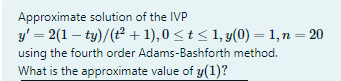

In [53]:
#Adam bashforth*
import numpy as np
from math import  cos

def f(t,y):
    return 2*(1-t*y)/(t**2 + 1) 

a,b,n = 0,1,20
h = (b-a)/n

t = np.linspace(a,b,n+1)
y = np.zeros(n+1)
y[0] = 1

for i in range(3):
    k1 = h*f(t[i],y[i])
    k2 = h*f(t[i]+h/2,y[i]+k1/2)
    k3 = h*f(t[i]+h/2,y[i]+k2/2)
    k4 = h*f(t[i]+h,y[i]+k3)
    y[i+1] = y[i] + (k1 + 2*k2 + 2*k3 + k4)/6

for i in range(3,n):
    y[i+1] = y[i] + h/24*(55*f(t[i],y[i])-59*f(t[i-1],y[i-1])+37*f(t[i-2],y[i-2])-9*f(t[i-3],y[i-3]))
    print(np.round(y[i+1],10))

1.3461397385
1.4117449584
1.4678719972
1.5144671748
1.5517277685
1.5800607459
1.6000351367
1.6123339833
1.6177094377
1.6169436346
1.6108166636
1.6000819845
1.5854488874
1.567571148
1.5470408061
1.5243859563
1.5000715073


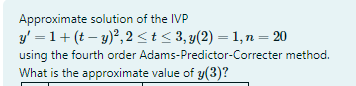

In [54]:
#Adams_Predictor_corrector
import numpy as np
from math import  sin

def f(t, y):
    return 1 + (t-y)**2

def adams_pc(f, a, b, ya, n):
    h = (b - a) / n
    t = np.linspace(a, b, n+1)
    w = np.zeros(n+1)
    w[0] = ya
    
    # Predictor: using the fourth-order Adams-Bashforth formula to estimate w[i+1]
    for i in range(3):
        k1 = h * f(t[i], w[i])
        k2 = h * f(t[i] + h/2, w[i] + k1/2)
        k3 = h * f(t[i] + h/2, w[i] + k2/2)
        k4 = h * f(t[i] + h, w[i] + k3)
        w[i+1] = w[i] + (k1 + 2*k2 + 2*k3 + k4) / 6
    
    # Corrector: using the fourth-order Adams-Moulton formula to improve w[i+1]
    for i in range(3, n):
        pred = w[i] + h * (55 * f(t[i], w[i]) - 59 * f(t[i-1], w[i-1]) + 37 * f(t[i-2], w[i-2]) - 9 * f(t[i-3], w[i-3])) / 24
        w[i+1] = w[i] + h * (9 * f(t[i+1], pred) + 19 * f(t[i], w[i]) - 5 * f(t[i-1], w[i-1]) + f(t[i-2], w[i-2])) / 24
    return t, w

# Main program
a = 2
b = 3
ya = 1
n = 20

t, y = adams_pc(f, a, b, ya, n)

# Print the results
print("t\t\t y")
print("----------------------")
for i in range(len(t)):
    print("{:.10f}\t {:.10f}".format(t[i], y[i]))

# Approximate value of y at t=2
y_approx = y[-1]
print("\nThe approximate value of y(2) is: {:.10f}".format(y_approx))

t		 y
----------------------
2.0000000000	 1.0000000000
2.0500000000	 1.0976190370
2.1000000000	 1.1909090732
2.1500000000	 1.2804347603
2.2000000000	 1.3666673488
2.2500000000	 1.4500011535
2.3000000000	 1.5307707014
2.3500000000	 1.6092609378
2.4000000000	 1.6857160936
2.4500000000	 1.7603467087
2.5000000000	 1.8333352476
2.5500000000	 1.9048406285
2.6000000000	 1.9750019031
2.6500000000	 2.0439412671
2.7000000000	 2.1117665393
2.7500000000	 2.1785732157
2.8000000000	 2.2444461811
2.8500000000	 2.3094611432
2.9000000000	 2.3736858402
2.9500000000	 2.4371810626
3.0000000000	 2.5000015216

The approximate value of y(2) is: 2.5000015216


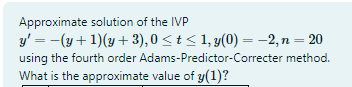

In [55]:
#Adams_Predictor_corrector
import numpy as np
from math import  sin

def f(t, y):
    return -(y+1)*(y+3)

def adams_pc(f, a, b, ya, n):
    h = (b - a) / n
    t = np.linspace(a, b, n+1)
    w = np.zeros(n+1)
    w[0] = ya
    
    # Predictor: using the fourth-order Adams-Bashforth formula to estimate w[i+1]
    for i in range(3):
        k1 = h * f(t[i], w[i])
        k2 = h * f(t[i] + h/2, w[i] + k1/2)
        k3 = h * f(t[i] + h/2, w[i] + k2/2)
        k4 = h * f(t[i] + h, w[i] + k3)
        w[i+1] = w[i] + (k1 + 2*k2 + 2*k3 + k4) / 6
    
    # Corrector: using the fourth-order Adams-Moulton formula to improve w[i+1]
    for i in range(3, n):
        pred = w[i] + h * (55 * f(t[i], w[i]) - 59 * f(t[i-1], w[i-1]) + 37 * f(t[i-2], w[i-2]) - 9 * f(t[i-3], w[i-3])) / 24
        w[i+1] = w[i] + h * (9 * f(t[i+1], pred) + 19 * f(t[i], w[i]) - 5 * f(t[i-1], w[i-1]) + f(t[i-2], w[i-2])) / 24
    return t, w

# Main program
a = 0
b = 1
ya = -2
n = 20

t, y = adams_pc(f, a, b, ya, n)

# Print the results
print("t\t\t y")
print("----------------------")
for i in range(len(t)):
    print("{:.10f}\t {:.10f}".format(t[i], y[i]))

# Approximate value of y at t=2
y_approx = y[-1]
print("\nThe approximate value of y(2) is: {:.10f}".format(y_approx))

t		 y
----------------------
0.0000000000	 -2.0000000000
0.0500000000	 -1.9500416276
0.1000000000	 -1.9003320107
0.1500000000	 -1.8511149745
0.2000000000	 -1.8026245641
0.2500000000	 -1.7550811155
0.3000000000	 -1.7086870812
0.3500000000	 -1.6636240904
0.4000000000	 -1.6200506407
0.4500000000	 -1.5781005929
0.5000000000	 -1.5378824612
0.5500000000	 -1.4994794497
0.6000000000	 -1.4629501542
0.6500000000	 -1.4283298286
0.7000000000	 -1.3956320995
0.7500000000	 -1.3648510097
0.8000000000	 -1.3359632768
0.8500000000	 -1.3089306579
0.9000000000	 -1.2837023311
0.9500000000	 -1.2602172145
1.0000000000	 -1.2384061638

The approximate value of y(2) is: -1.2384061638


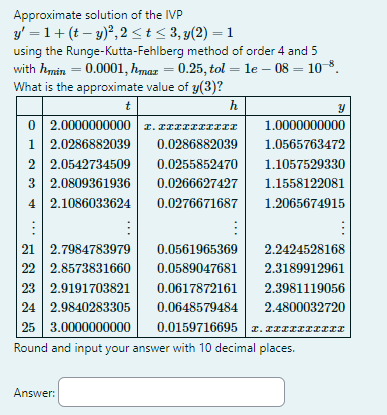

In [56]:
#RungeKuttaFehlberg45
from collections.abc import Callable
import numpy as np
from typing import Optional
import pandas as pd

def RungeKuttaFehlberg45(f: Callable[[np.float64, np.float64], np.float64],
                         t_span: np.ndarray,
                         y_init: np.float64,
                         h_max: Optional[np.float64] = 0.25,
                         h_min: Optional[np.float64] = 0.0001,
                         tol: Optional[np.float64] = 1e-08
                         ) -> pd.DataFrame:
    t = t_span[0]
    y = y_init
    h = h_max
    i = 0
    df = pd.DataFrame(data={'t': [t], 'h': [None], 'y': [y]})
    # TODO: Butcher tableau of Runge-Kutta-Fehlberg of order 4 and 5
    c = np.array(object=[0., 1./4., 3./8., 12./13., 1., 1./2.], dtype=np.float64)
    a = np.array(object=[[0., 0., 0., 0., 0.],
                         [1./4., 0., 0., 0., 0.],
                         [3./32., 9./32., 0., 0., 0.],
                         [1932./2197., -7200./2197., 7296./2197., 0., 0.],
                         [439./216., -8., 3680./513., -845./4104., 0.],
                         [-8./27., 2., -3544./2565., 1859./4104., -11./40.]], dtype=np.float64)
    b = np.array(object=[25./216., 0., 1408./2565., 2197./4104., -1./5.], dtype=np.float64)
    # bp = np.array(object=[25./216., 0., 1408./2565., 2197./4104., -1./5., 0.], dtype=np.float64)
    # db = b - bp
    db = np.array(object=[1./360., 0., -128./4275., -2197./75240., 1./50., 2./55.], dtype=np.float64)
    flag = 1
    while flag:
        k0 = f(t, y)
        k1 = f(t + c[1]*h, y + (a[1, 0]*k0)*h)
        k2 = f(t + c[2]*h, y + (a[2, 0]*k0 + a[2, 1]*k1)*h)
        k3 = f(t + c[3]*h, y + (a[3, 0]*k0 + a[3, 1]*k1 + a[3, 2]*k2)*h)
        k4 = f(t + c[4]*h, y + (a[4, 0]*k0 + a[4, 1]*k1 + a[4, 2]*k2 + a[4, 3]*k3)*h)
        k5 = f(t + c[5]*h, y + (a[5, 0]*k0 + a[5, 1]*k1 + a[5, 2]*k2 + a[5, 3]*k3 + a[5, 4]*k4)*h)
        r = abs(db[0]*k0 + db[1]*k1 + db[2]*k2 + db[3]*k3 + db[4]*k4 + db[5]*k5)
        # TODO: Check if the truncation error r is acceptable
        if r <= tol:
            t = t + h
            y = y + (b[0]*k0 + b[1]*k1 + b[2]*k2 + b[3]*k3 + b[4]*k4) * h
            i = i + 1
            df.loc[i, :] = [t, h, y]
        d = 0.84*(tol / r)**(1./4.)
        # TODO: Control the factor d by 0.1 <= h_new / h_old <= 4.0
        if d < 0.1:
            d = 0.1
        elif d > 4.0:
            d = 4.0
        h = d * h
        # TODO: Control h with constraint h <= h_max
        if h > h_max:
            h = h_max
        # TODO: Check if last step reached
        if t >= t_span[1]:
            flag = 0
            print(f':) Successfully completed with {i} steps!')
        elif t + h > t_span[1]:
            h = t_span[1] - t
        # TODO: Check if h is too small
        elif h < h_min:
            flag = 0
            print(f':( At i = {i}, h_i = {h} < h_min = {h_min}.')
    return df


if __name__ == "__main__":
    
    def f(t: np.float64, y: np.float64) -> np.float64:
        return 1 + (t-y)**2
    
    t_span = np.array(object=[2,3], dtype=np.float64)
    y_init = 1
    h_min = 0.0001
    h_max = 0.25
    tol = 1e-08
    df = RungeKuttaFehlberg45(f=f,
                              t_span=t_span,
                              y_init=y_init,
                              h_min=h_min,
                              h_max=h_max,
                              tol=tol)
    pd.options.display.float_format="{:.10f}".format
    print(df)

:) Successfully completed with 25 steps!
              t            h            y
0  2.0000000000         None 1.0000000000
1  2.0286882039 0.0286882039 1.0565763472
2  2.0542734509 0.0255852470 1.1057529330
3  2.0809361936 0.0266627427 1.1558122081
4  2.1086033624 0.0276671687 1.2065674915
5  2.1373293889 0.0287260266 1.2580766333
6  2.1671682274 0.0298388385 1.3103937063
7  2.1981774046 0.0310091772 1.3635764556
8  2.2304181727 0.0322407680 1.4176863542
9  2.2639558040 0.0335376314 1.4727889012
10 2.2988599101 0.0349041061 1.5289539404
11 2.3352047886 0.0363448785 1.5862560078
12 2.3730698039 0.0378650153 1.6447747125
13 2.4125398046 0.0394700007 1.7045951542
14 2.4537055796 0.0411657751 1.7658083796
15 2.4966643610 0.0429587814 1.8285118856
16 2.5415203748 0.0448560138 1.8928101703
17 2.5883854483 0.0468650736 1.9588153410
18 2.6373796793 0.0489942309 2.0266477826
19 2.6886321735 0.0512524942 2.0964368970
20 2.7422818610 0.0536496875 2.1683219186
21 2.7984783979 0.0561965369 2.2424

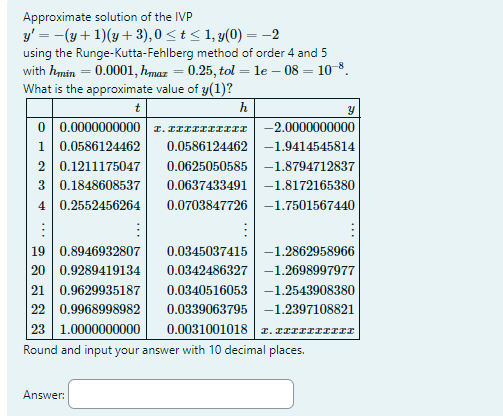

In [57]:
#RungeKuttaFehlberg45
from collections.abc import Callable
import numpy as np
from typing import Optional
import pandas as pd

def RungeKuttaFehlberg45(f: Callable[[np.float64, np.float64], np.float64],
                         t_span: np.ndarray,
                         y_init: np.float64,
                         h_max: Optional[np.float64] = 0.25,
                         h_min: Optional[np.float64] = 0.0001,
                         tol: Optional[np.float64] = 1e-08
                         ) -> pd.DataFrame:
    t = t_span[0]
    y = y_init
    h = h_max
    i = 0
    df = pd.DataFrame(data={'t': [t], 'h': [None], 'y': [y]})
    # TODO: Butcher tableau of Runge-Kutta-Fehlberg of order 4 and 5
    c = np.array(object=[0., 1./4., 3./8., 12./13., 1., 1./2.], dtype=np.float64)
    a = np.array(object=[[0., 0., 0., 0., 0.],
                         [1./4., 0., 0., 0., 0.],
                         [3./32., 9./32., 0., 0., 0.],
                         [1932./2197., -7200./2197., 7296./2197., 0., 0.],
                         [439./216., -8., 3680./513., -845./4104., 0.],
                         [-8./27., 2., -3544./2565., 1859./4104., -11./40.]], dtype=np.float64)
    b = np.array(object=[25./216., 0., 1408./2565., 2197./4104., -1./5.], dtype=np.float64)
    # bp = np.array(object=[25./216., 0., 1408./2565., 2197./4104., -1./5., 0.], dtype=np.float64)
    # db = b - bp
    db = np.array(object=[1./360., 0., -128./4275., -2197./75240., 1./50., 2./55.], dtype=np.float64)
    flag = 1
    while flag:
        k0 = f(t, y)
        k1 = f(t + c[1]*h, y + (a[1, 0]*k0)*h)
        k2 = f(t + c[2]*h, y + (a[2, 0]*k0 + a[2, 1]*k1)*h)
        k3 = f(t + c[3]*h, y + (a[3, 0]*k0 + a[3, 1]*k1 + a[3, 2]*k2)*h)
        k4 = f(t + c[4]*h, y + (a[4, 0]*k0 + a[4, 1]*k1 + a[4, 2]*k2 + a[4, 3]*k3)*h)
        k5 = f(t + c[5]*h, y + (a[5, 0]*k0 + a[5, 1]*k1 + a[5, 2]*k2 + a[5, 3]*k3 + a[5, 4]*k4)*h)
        r = abs(db[0]*k0 + db[1]*k1 + db[2]*k2 + db[3]*k3 + db[4]*k4 + db[5]*k5)
        # TODO: Check if the truncation error r is acceptable
        if r <= tol:
            t = t + h
            y = y + (b[0]*k0 + b[1]*k1 + b[2]*k2 + b[3]*k3 + b[4]*k4) * h
            i = i + 1
            df.loc[i, :] = [t, h, y]
        d = 0.84*(tol / r)**(1./4.)
        # TODO: Control the factor d by 0.1 <= h_new / h_old <= 4.0
        if d < 0.1:
            d = 0.1
        elif d > 4.0:
            d = 4.0
        h = d * h
        # TODO: Control h with constraint h <= h_max
        if h > h_max:
            h = h_max
        # TODO: Check if last step reached
        if t >= t_span[1]:
            flag = 0
            print(f':) Successfully completed with {i} steps!')
        elif t + h > t_span[1]:
            h = t_span[1] - t
        # TODO: Check if h is too small
        elif h < h_min:
            flag = 0
            print(f':( At i = {i}, h_i = {h} < h_min = {h_min}.')
    return df


if __name__ == "__main__":
    
    def f(t: np.float64, y: np.float64) -> np.float64:
        return -(y+1)*(y+3)
    
    t_span = np.array(object=[0,1], dtype=np.float64)
    y_init = -2
    h_min = 0.0001
    h_max = 0.25
    tol = 1e-08
    df = RungeKuttaFehlberg45(f=f,
                              t_span=t_span,
                              y_init=y_init,
                              h_min=h_min,
                              h_max=h_max,
                              tol=tol)
    pd.options.display.float_format="{:.10f}".format
    print(df)

:) Successfully completed with 23 steps!
              t            h             y
0  0.0000000000         None -2.0000000000
1  0.0586124462 0.0586124462 -1.9414545814
2  0.1211175047 0.0625050585 -1.8794712837
3  0.1848608537 0.0637433491 -1.8172165380
4  0.2552456264 0.0703847726 -1.7501567440
5  0.3214063950 0.0661607686 -1.6892219637
6  0.3750290665 0.0536226715 -1.6416172686
7  0.4287540879 0.0537250214 -1.5957204439
8  0.4770488807 0.0482947928 -1.5561229522
9  0.5216708147 0.0446219340 -1.5210114777
10 0.5638373125 0.0421664978 -1.4891809910
11 0.6042127376 0.0403754250 -1.4599595262
12 0.6432101167 0.0389973792 -1.4329186784
13 0.6811143476 0.0379042308 -1.4077566381
14 0.7181353680 0.0370210205 -1.3842470202
15 0.7544351250 0.0362997570 -1.3622125632
16 0.7901429018 0.0357077767 -1.3415100165
17 0.8253647345 0.0352218327 -1.3220207665
18 0.8601895392 0.0348248047 -1.3036446829
19 0.8946932807 0.0345037415 -1.2862958966
20 0.9289419134 0.0342486327 -1.2698997977
21 0.96299351

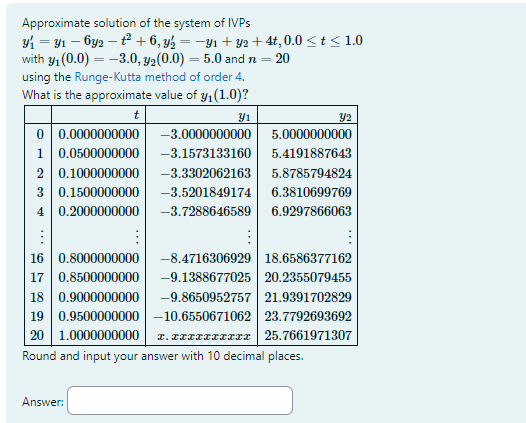

In [93]:
#4_order_Runge_kutta_ivp   
import numpy as np

def f(t, y):
    y1, y2 = y
    return y1 - 6*y2 - t**2 + 6, -y1 + y2 + 4*t 

def runge_kutta_ivp(f, t0, y0, h, n):
    t_values = [t0]
    y_values = [y0]

    for i in range(n):
        tn = t_values[-1]
        yn = y_values[-1]

        k1 = h * np.array(f(tn, yn))
        k2 = h * np.array(f(tn + h/2, yn + k1/2))
        k3 = h * np.array(f(tn + h/2, yn + k2/2))
        k4 = h * np.array(f(tn + h, yn + k3))

        yn1 = yn + (k1 + 2*k2 + 2*k3 + k4)/6
        tn1 = tn + h

        t_values.append(tn1)
        y_values.append(yn1)

    return t_values, y_values

t0 = 0.0
y0 = [-3,5]
h = 1.0 / 20
n = 20

t_values, y_values = runge_kutta_ivp(f, t0, y0, h, n)

# Printing the values
print("t\t\ty1\t\t\t\ty2")
for t, y in zip(t_values, y_values):
    print("{:.10f}\t{:.10f}\t{:.10f}".format(t, y[0], y[1]))
    
y1_solution = y_values[-1][0]
print("\nApproximate value of y1(1.0): {:.10f}".format(y1_solution))

t		y1				y2
0.0000000000	-3.0000000000	5.0000000000
0.0500000000	-4.4504883268	5.4512356901
0.1000000000	-6.1312697730	6.0158873762
0.1500000000	-8.0920851927	6.7128070160
0.2000000000	-10.3915787494	7.5645830241
0.2500000000	-13.0990060308	8.5982304975
0.3000000000	-16.2962614495	9.8460122856
0.3500000000	-20.0802851934	11.3464154734
0.4000000000	-24.5659213147	13.1453124712
0.4500000000	-29.8893120188	15.2973414067
0.5000000000	-36.2119292119	17.8675470492
0.5500000000	-43.7253633839	20.9333312598
0.6000000000	-52.6570124954	24.5867711899
0.6500000000	-63.2768403900	28.9373744090
0.7000000000	-75.9054061511	34.1153531735
0.7500000000	-90.9234037366	40.2755155218
0.8000000000	-108.7829962669	47.6018892743
0.8500000000	-130.0212828688	56.3132168703
0.9000000000	-155.2762995784	66.6694849377
0.9500000000	-185.3060313816	78.9796833488
1.0000000000	-221.0110022690	93.6110251742

Approximate value of y1(1.0): -221.0110022690


In [87]:
import math

def runge_kutta(y10, y20, t0, h, n):

  y1 = [y10]
  y2 = [y20]
  for i in range(1, n + 1):
    k11 = y1[i - 1] - 6 * y2[i - 1] - t0 ** 2 + 6
    k12 = -y1[i - 1] + y2[i - 1] + 4 * t0
    k21 = y1[i - 1] + h * k11 / 2
    k22 = y2[i - 1] + h * k12 / 2
    k31 = y1[i - 1] + h * k21 / 2
    k32 = y2[i - 1] + h * k22 / 2
    k41 = y1[i - 1] + h * k31
    k42 = y2[i - 1] + h * k32
    y1.append(y1[i - 1] + h * (k11 + 2 * k21 + 2 * k31 + k41) / 6)
    y2.append(y2[i - 1] + h * (k12 + 2 * k22 + 2 * k32 + k42) / 6)
    df = pd.DataFrame({'y1':y1,'y2':y2})

  print(df)
  return y1, y2

if __name__ == "__main__":
  y1, y2 = runge_kutta(-3, 5, 0, 0.05, 20)
  print(y1[-1])

               y1            y2
0   -3.0000000000  5.0000000000
1   -3.3640695313  5.2826375000
2   -3.7616618808  5.5829556294
3   -4.1954251659  5.9021545759
4   -4.6682063624  6.2415192616
5   -5.1830659545  6.6024254293
6   -5.7432936554  6.9863461696
7   -6.3524252770  7.3948589201
8   -7.0142608329  7.8296529716
9   -7.7328839633  8.2925375173
10  -8.5126827798  8.7854502851
11  -9.3583722320  9.3104667952
12 -10.2750181081  9.8698102883
13 -11.2680627871 10.4658623725
14 -12.3433528720 11.1011744428
15 -13.5071688391 11.7784799271
16 -14.7662568515 12.5007074202
17 -16.1278628945 13.2709947702
18 -17.5997694009 14.0927041861
19 -19.1903345490 14.9694384401
20 -20.9085344260 15.9050582459
-20.908534426028137


In [95]:
import numpy as np

def f(t, yz):
    y, z = yz
    dy_dt = z
    dz_dt = 4 * z - 4 * y + np.exp(2 * t)
    return [dy_dt, dz_dt]

def runge_kutta4(t_values, yz_init, h):
    yz_values = [yz_init]
    for i in range(1, len(t_values)):
        tn = t_values[i-1]
        yzn = yz_values[-1]

        k1 = [h * val for val in f(tn, yzn)]
        k2 = [h * val for val in f(tn + h/2, [yz + k/2 for yz, k in zip(yzn, k1)])]
        k3 = [h * val for val in f(tn + h/2, [yz + k/2 for yz, k in zip(yzn, k2)])]
        k4 = [h * val for val in f(tn + h, [yz + k for yz, k in zip(yzn, k3)])]

        yz_next = [yz + (k1 + 2*k2 + 2*k3 + k4) / 6 for yz, k1, k2, k3, k4 in zip(yzn, k1, k2, k3, k4)]
        yz_values.append(yz_next)
    return yz_values

if __name__ == "__main__":
    t_values = np.linspace(0.0, 1.0, num=21)  # t values from 0.0 to 1.0 with n=20 steps
    y_init = -1.0  # Initial condition y(0.0) = -1.0
    z_init = 0.0  # Initial condition y'(0.0) = 0.0
    yz_init = [y_init, z_init]

    h = t_values[1] - t_values[0]

    yz_values = runge_kutta4(t_values, yz_init, h)
    y_approx = yz_values[-1][0]  # Approximate value of y(1.0)

    print("Approximate value of y(1.0): {:.10f}".format(y_approx))


Approximate value of y(1.0): 11.0834760026


In [96]:
import numpy as np

def f(t, yz):
    y, z = yz
    dy_dt = z
    dz_dt = 4 * z - 5 * y - np.sin(t)
    return [dy_dt, dz_dt]

def runge_kutta4(t_values, yz_init, h):
    yz_values = [yz_init]
    for i in range(1, len(t_values)):
        tn = t_values[i-1]
        yzn = yz_values[-1]

        k1 = [h * val for val in f(tn, yzn)]
        k2 = [h * val for val in f(tn + h/2, [yz + k/2 for yz, k in zip(yzn, k1)])]
        k3 = [h * val for val in f(tn + h/2, [yz + k/2 for yz, k in zip(yzn, k2)])]
        k4 = [h * val for val in f(tn + h, [yz + k for yz, k in zip(yzn, k3)])]

        yz_next = [yz + (k1 + 2*k2 + 2*k3 + k4) / 6 for yz, k1, k2, k3, k4 in zip(yzn, k1, k2, k3, k4)]
        yz_values.append(yz_next)
    return yz_values

if __name__ == "__main__":
    t_values = np.linspace(0.0, 1.0, num=21)  # t values from 0.0 to 1.0 with n=20 steps
    y_init = 0.0  # Initial condition y(0.0) = 0.0
    z_init = -2.0  # Initial condition y'(0.0) = -2.0
    yz_init = [y_init, z_init]

    h = t_values[1] - t_values[0]    

    yz_values = runge_kutta4(t_values, yz_init, h)
    y_approx = yz_values[-1][0]  # Approximate value of y(1.0)

    print("Approximate value of y(1.0): {:.10f}".format(y_approx))

Approximate value of y(1.0): -12.8862460483


### Rungekutta of Order 2

In [ ]:
from collections.abc import Callable
from typing import Literal
from typing import Optional
import pandas as pd
import numpy as np

def Rungekutta2(f:Callable[[float,float],float],
                t_span: list or tuple,
                y_init:float,
                n:int,
                method:Optional[Literal["Midpoint","Heun","Ralston"]])-> pd.DataFrame:

    print("{method} method is used ")
    (a,b) = t_span
    h=(b-a)/n
    
    t = np.linspace(start=a,stop=b,num=n+1, dtype=np.float64)
    y = np.full_like(a=t,fill_value=np.nan,dtype=np.float64)
    
    y[0]=y_init

    if method == "Midpoint":
        c = np.array([0.0,1.0/2.0],dtype = np.float64)
        a = np.array(object= [[0, 0],
                         [1/2,0]],
                dtype=np.float64)
        b = np.array(object=[0,1],dtype = np.float64)
    
    elif method=="Heun":
        c = np.array([0,1],dtype = np.float64)
        a = np.array(object= [[0, 0],
                         [1,0]],
                dtype=np.float64)
        b = np.array(object=[0,1],dtype = np.float64)
    
    else:
        c = np.array([0.0,2/3],dtype = np.float64)
        a = np.array(object= [[0, 0],
                         [2/3,0]],
                dtype=np.float64)
        b = np.array(object=[1/4,3/4],dtype = np.float64)
   
    for i in range(0,n,1):
        k0= f(t[i],y[i])
        k1= f(t[i]+c[1]*h, y[i]+(a[1,0]*k0)*h)
        y[i+1]=y[i]+ h*(b[0]*k0 + b[1]*k1)  

    df = pd.DataFrame(data={"t":t, "y":y})
    return df


if __name__=="__main__":
    
    def f(t:float,y:float): 
        return -(y+1)*(y+3)
    
    t_span = [0.0, 1.0]
    y_init = 1.0
    n=10
    
    methods=["Midpoint","Heun","Ralston"]
    
    def y(t:float)-> float:
        return -(y+1)*(y+3)*t
    
    t = np.linspace(start=t_span[0], stop=t_span[1], num = n+1,dtype=np.float64) 
    df = pd.DataFrame(data = {"t": t})
    df["exact"] = df["t"].apply(func=y)
    
    for method in methods:
        dfi = Rungekutta2(f=f,t_span=t_span,y_init=y_init,n=n,method=method)
        df = pd.concat(objs= [df, dfi["y"]],axis=1)
        df[f"e_{method}"] = abs(df["exact"] - df["y"])
        df.rename(columns={"y": f"y_{method}"}, inplace=True)
        df["exact"]=df["t"].apply(func=y)
        df["error"]=abs(df["exact"]-df["y"]) 

In [ ]:
import sympy as sp
t = sp.symbols('t')
y = sp.Function('y')(t)

diff_eq = sp.Eq(sp.diff(y, t), -(y + 1)*(y + 3))

sol = sp.dsolve(diff_eq, y)

sol

Eq(y(t), -(3*exp(2*C1 - 2*t) - 1)/(exp(2*C1 - 2*t) - 1))

In [ ]:
diff_eq

Eq(Derivative(y(t), t), (-y(t) - 1)*(y(t) + 3))

In [ ]:
y = 0 
sol

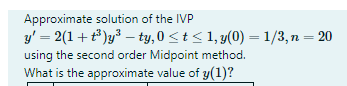

In [18]:
import numpy as np

# Define the function
def f(t, y):
    return 2*(1 + t**3) * y**3 - t*y 

# Define the Ralston method
def ralston_method(f, a, b, y0, n):
    h = (b - a) / n
    t = np.linspace(a, b, n+1)
    y = np.zeros(n+1)
    y[0] = y0

    for i in range(n):
        k1 = f(t[i], y[i])
        k2 = f(t[i] + (2/3)*h, y[i] + (2/3)*h*k1)
        y[i+1] = y[i] + (h/4)*(k1 + 3*k2)
        print(y[i])

    return y[-1]

# Set the initial values
a = 0
b = 1
y0 = 1/3
n = 20

# Approximate y(1) using the Ralston method
approximation = ralston_method(f, a, b, y0, n)

# Print the result rounded to 10 decimal places
print('\n',(approximation))

0.3333333333333333
0.33667957590592784
0.3392798879252799
0.34110387897801975
0.342128265499028
0.3423375246096687
0.34172429400640997
0.3402894938150969
0.33804216664630177
0.33499905291154275
0.33118393741799235
0.32662681828438117
0.32136295887026234
0.3154318870435018
0.30887640389864396
0.3017416568286444
0.2940743209318666
0.2859219195687004
0.2773323008735711
0.2683532733647846

 0.25903239136783895


In [24]:
def f(t, y):
    return 2 * (1 + t**3) * y**3 - t * y

def midpoint_method(t0, y0, h, n):
    t_current = t0
    y_current = y0
    
    t_current1 = []
    y_current1 = []

    for i in range(n):
        k1 = h * f(t_current, y_current)
        k2 = h * f(t_current + h / 2, y_current + k1 / 2)
        y_current += k2
        t_current += h
        
        t_current1.append(t_current)
        y_current1.append(y_current)
    df = pd.DataFrame({'t':t_current1,'y':y_current1})
    print(df)
    return y_current

# Given data
t0 = 0
y0 = 1/3
n = 20
h = 1 / n

# Approximate y(1) using the Midpoint method
y_approx = midpoint_method(t0, y0, h, n)
print("Approximate value of y(1) using the Midpoint method:", y_approx)

              t            y
0  0.0500000000 0.3366801864
1  0.1000000000 0.3392808887
2  0.1500000000 0.3411050206
3  0.2000000000 0.3421292767
4  0.2500000000 0.3423381222
5  0.3000000000 0.3417241933
6  0.3500000000 0.3402884197
7  0.4000000000 0.3380398634
8  0.4500000000 0.3349952934
9  0.5000000000 0.3311785301
10 0.5500000000 0.3266196117
11 0.6000000000 0.3213538437
12 0.6500000000 0.3154207961
13 0.7000000000 0.3088633092
14 0.7500000000 0.3017265657
15 0.8000000000 0.2940572703
16 0.8500000000 0.2859029697
17 0.9000000000 0.2773115292
18 0.9500000000 0.2683307682
19 1.0000000000 0.2590082467
Approximate value of y(1) using the Midpoint method: 0.2590082466568242


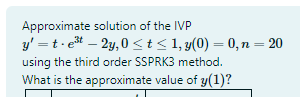

In [15]:
import numpy as np

# Define the function
def f(t, y):
    return t*np.exp(3*t) - 2*y

# Define the third-order Ralston method
def ralston_method(f, a, b, y0, n):
    h = (b - a) / n
    t = np.linspace(a, b, n+1)
    y = np.zeros(n+1)
    y[0] = y0

    for i in range(n):
        k1 = f(t[i], y[i])
        k2 = f(t[i] + (2/3)*h, y[i] + (2/3)*h*k1)
        k3 = f(t[i] + (2/3)*h, y[i] + (2/3)*h*k2)
        
        y[i+1] = y[i] + (h/4)*(k1 + 3*k3)
        print(i,y[i])
        
    return None

# Set the initial values
a = 0
b = 1
y0 = 0
n = 21

# Approximate y(3) using the Ralston method
approximation = ralston_method(f, a, b, y0, n)

# Print the result rounded to 10 decimal places
approximation


0 0.0
1 0.0011678962293536306
2 0.00509159591025166
3 0.012371832403975633
4 0.023748700848195976
5 0.04012848787060475
6 0.06261561936963708
7 0.09255065061905722
8 0.1315553874852654
9 0.1815864206911956
10 0.24499858173774672
11 0.3246200950569749
12 0.42384151295050504
13 0.5467208857311336
14 0.6981080484357112
15 0.8837914082676811
16 1.1106712061274253
17 1.386963915885615
18 1.722443253609736
19 2.1287242158134454
20 2.619597674376692


In [16]:
import numpy as np

# Define the function
def f(t, y):
    return t * np.exp(3*t) - 2*y

# Define the third-order SSPRK3 method
def ssprk3_method(f, a, b, y0, n):
    h = (b - a) / n
    t = np.linspace(a, b, n+1)
    y = np.zeros(n+1)
    y[0] = y0

    for i in range(n):
        k1 = f(t[i], y[i])
        k2 = f(t[i] + (1/2)*h, y[i] + (1/2)*h*k1)
        k3 = f(t[i] + h, y[i] - h*k1 + 2*h*k2)
        y[i+1] = y[i] + (h/6)*(k1 + 4*k2 + k3)
        print(i,y[i])

    return

# Set the initial values
a = 0
b = 1
y0 = 0
n = 21

# Approximate y(1) using the SSPRK3 method
approximation = ssprk3_method(f, a, b, y0, n)

# Print the result
approximation


0 0.0
1 0.0012091300817307182
2 0.005179199493131193
3 0.012512575631567047
4 0.023951243529245787
5 0.04040368981749246
6 0.06297691383611251
7 0.09301449181788995
8 0.1321417848930854
9 0.18231957513567476
10 0.2459076409393753
11 0.3257400494310285
12 0.4252142561426404
13 0.548396468653807
14 0.7001461605990454
15 0.8862631260822138
16 1.11366105474296
17 1.3905722991902185
18 1.7267893164443042
19 2.1339492134919724
20 2.6258689375109947


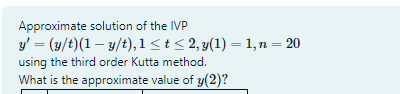

              t            y        exact        error
0  1.0000000000 1.0000000000 2.0000000000 1.0000000000
1  1.0500000000 1.0015047142 1.8542853823 0.8527806682
2  1.1000000000 1.0048979168 1.7241133391 0.7192154224
3  1.1500000000 1.0098019741 1.6068541341 0.5970521600
4  1.2000000000 1.0159294688 1.5004329441 0.4845034753
5  1.2500000000 1.0230580452 1.4031989693 0.3801409240
6  1.3000000000 1.0310131926 1.3138289695 0.2828157769
7  1.3500000000 1.0396561967 1.2312552278 0.1915990311
8  1.4000000000 1.0488755407 1.1546110980 0.1057355573
9  1.4500000000 1.0585806571 1.0831893766 0.0246087195
10 1.5000000000 1.0686973175 1.0164101467 0.0522871709
11 1.5500000000 1.0791641802 0.9537956948 0.1253684854
12 1.6000000000 1.0899301714 0.8949507694 0.1949794021
13 1.6500000000 1.1009524758 0.8395469115 0.2614055642
14 1.7000000000 1.1121949763 0.7873099232 0.3248850531
15 1.7500000000 1.1236270326 0.7380097715 0.3856172610
16 1.8000000000 1.1352225136 0.6914524043 0.4437701093
17 1.85000

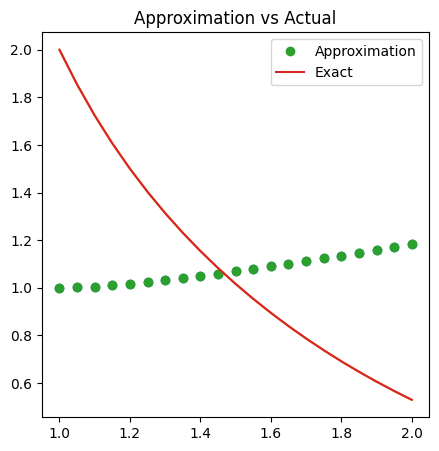

In [17]:
from collections.abc import Callable
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

def RungKutta3(f:Callable[[np.float64,np.float64],np.float64],
               t_span:np.ndarray,
               y_int:np.float64,
               n:np.int64)->pd.DataFrame:
    
    h = (t_span[1]-t_span[0])/n     
    t = np.linspace(start=t_span[0],stop=t_span[1],num=n+1,dtype=np.float64)
    y = np.full_like(a=t,fill_value=np.nan,dtype=np.float64)
    y[0] = y_int 
    
    for i in range(0,n,1):
        k1 = f(t[i],y[i])
        k2 = f(t[i] + 0.5*h , y[i] + 0.5*h*k1)
        k3 = f(t[i] + h , y[i] + h*k2)
        y[i+1] = y[i] + h*(k1 + 2.0*k2 + 2.0*k3 + k3)/6.0 
        
    df = pd.DataFrame(data={'t':t,'y':y},dtype=np.float64)
    return df 


if __name__ == '__main__':
    
    def f(t:np.float64,y:np.float64)->np.float64:
        return y/t * (1 - y/t) 
    
    t_span = np.array(object=[1,2],dtype=np.float64)
    y_init = 1
    n = 20
    
    df = RungKutta3(f=f,t_span=t_span,y_int=y_init,n=n)
    
    def y(t:np.float64)->np.float64:
        return 0.5*t**(-2) * (4+np.cos(2)-np.cos(2*t))
    
    df.loc[:,'exact'] = df.loc[:,'t'].apply(func=y)
    df.loc[:,'error'] = abs(df.loc[:,'y']-df.loc[:,'exact'])
    pd.options.display.float_format = '{:.10f}'.format
    print(df)
    
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(1,1,1)
    ax.plot(df.loc[:,'t'],df.loc[:,'y'],'o')
    ax.plot(df.loc[:,'t'],df.loc[:,'exact'],'-')
  
    plt.title('Approximation vs Actual')
    ax.plot(df.loc[:, 't'], df.loc[:, 'y'], 'o', label='Approximation')
    ax.plot(df.loc[:, 't'], df.loc[:, 'exact'], '-', label='Exact')
    ax.legend()
    plt.show()

# Quiz 02

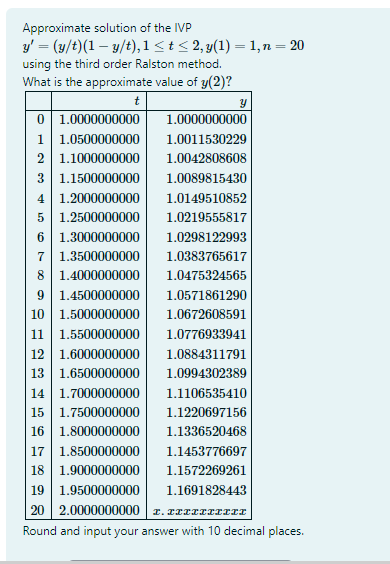

              t            y        exact        error
0  1.0000000000 1.0000000000 0.5000000000 0.5000000000
1  1.0500000000 1.0015047142 0.5250000000 0.4765047142
2  1.1000000000 1.0048979168 0.5500000000 0.4548979168
3  1.1500000000 1.0098019741 0.5750000000 0.4348019741
4  1.2000000000 1.0159294688 0.6000000000 0.4159294688
5  1.2500000000 1.0230580452 0.6250000000 0.3980580452
6  1.3000000000 1.0310131926 0.6500000000 0.3810131926
7  1.3500000000 1.0396561967 0.6750000000 0.3646561967
8  1.4000000000 1.0488755407 0.7000000000 0.3488755407
9  1.4500000000 1.0585806571 0.7250000000 0.3335806571
10 1.5000000000 1.0686973175 0.7500000000 0.3186973175
11 1.5500000000 1.0791641802 0.7750000000 0.3041641802
12 1.6000000000 1.0899301714 0.8000000000 0.2899301714
13 1.6500000000 1.1009524758 0.8250000000 0.2759524758
14 1.7000000000 1.1121949763 0.8500000000 0.2621949763
15 1.7500000000 1.1236270326 0.8750000000 0.2486270326
16 1.8000000000 1.1352225136 0.9000000000 0.2352225136
17 1.85000

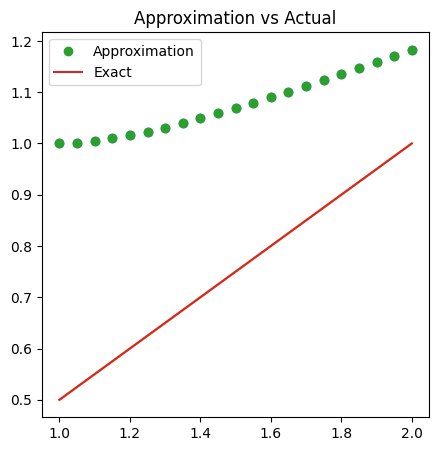

In [18]:
from collections.abc import Callable
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

def RungKutta3(f:Callable[[np.float64,np.float64],np.float64],
               t_span:np.ndarray,
               y_int:np.float64,
               n:np.int64)->pd.DataFrame:
    
    h = (t_span[1]-t_span[0])/n     
    t = np.linspace(start=t_span[0],stop=t_span[1],num=n+1,dtype=np.float64)
    y = np.full_like(a=t,fill_value=np.nan,dtype=np.float64)
    y[0] = y_int 
    
    for i in range(0,n,1):
        k1 = f(t[i],y[i])
        k2 = f(t[i] + 0.5*h , y[i] + 0.5*h*k1)
        k3 = f(t[i] + h , y[i] + h*k2)
        y[i+1] = y[i] + h*(k1 + 2.0*k2 + 2.0*k3 + k3)/6.0 
        
    df = pd.DataFrame(data={'t':t,'y':y},dtype=np.float64)
    return df 


if __name__ == '__main__':
    
    def f(t:np.float64,y:np.float64)->np.float64:
        return (y/t)*(1-y/t)
    
    t_span = np.array(object=[1,2],dtype=np.float64)
    y_init = 1
    n = 20
    df = RungKutta3(f=f,t_span=t_span,y_int=y_init,n=n)
    
    def y(t:np.float64)->np.float64:
        return t/2
    
    df.loc[:,'exact'] = df.loc[:,'t'].apply(func=y)
    df.loc[:,'error'] = abs(df.loc[:,'y']-df.loc[:,'exact'])
    pd.options.display.float_format = '{:.10f}'.format
    print(df)
    
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(1,1,1)
    ax.plot(df.loc[:,'t'],df.loc[:,'y'],'o')
    ax.plot(df.loc[:,'t'],df.loc[:,'exact'],'-')
  
    plt.title('Approximation vs Actual')
    ax.plot(df.loc[:, 't'], df.loc[:, 'y'], 'o', label='Approximation')
    ax.plot(df.loc[:, 't'], df.loc[:, 'exact'], '-', label='Exact')
    ax.legend()
    plt.show()

In [19]:
import numpy as np

# Define the function
def f(t, y):
    return (y/t)*(1 - y/t)

# Define the third-order Ralston method
def ralston_method(f, a, b, y0, n):
    h = (b - a) / n
    t = np.linspace(a, b, n+1)
    y = np.zeros(n+1)
    y[0] = y0

    for i in range(n):
        k1 = f(t[i], y[i])
        k2 = f(t[i] + (2/3)*h, y[i] + (2/3)*h*k1)
        k3 = f(t[i] + (2/3)*h, y[i] + (2/3)*h*k1)
        y[i+1] = y[i] + (h/4)*(k1 + 3*k3)
        print(i,y[i])
        
    return y[-1]

# Set the initial values
a = 1
b = 2
y0 = 1
n = 21

# Approximate y(2) using the Ralston method
approximation = ralston_method(f, a, b, y0, n)

# Print the result
print(round(approximation,10))

0 1.0
1 1.0010650887573964
2 1.003935278375965
3 1.0082583936622098
4 1.013764677300933
5 1.0202442257274356
6 1.02753142841188
7 1.0354940039677736
8 1.0440251261425286
9 1.053037671351849
10 1.0624599509389139
11 1.0722325005367337
12 1.0823056339191706
13 1.0926375576462566
14 1.1031929024714275
15 1.113941568193862
16 1.1248578068608857
17 1.1359194890696909
18 1.1471075122573557
19 1.1584053200676816
20 1.1697985093251317
1.1812745066


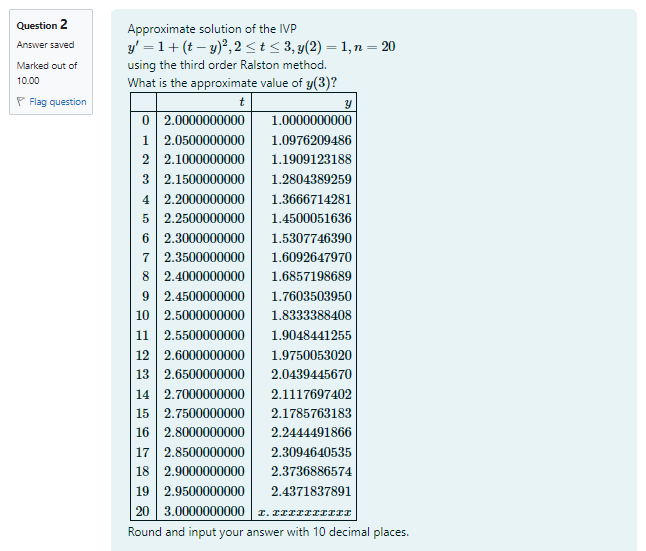

In [20]:
import numpy as np

# Define the function
def f(t, y):
    return 1 + (t-y)**2

# Define the third-order Ralston method
def ralston_method(f, a, b, y0, n):
    h = (b - a) / n
    t = np.linspace(a, b, n+1)
    y = np.zeros(n+1)
    y[0] = y0

    for i in range(n):
        k1 = f(t[i], y[i])
        k2 = f(t[i] + (2/3)*h, y[i] + (2/3)*h*k1)
        k3 = f(t[i] + (2/3)*h, y[i] + (2/3)*h*k1)
        y[i+1] = y[i] + (h/4)*(k1 + 3*k3)
        print(i,y[i])
        
    return y[-1]

# Set the initial values
a = 2
b = 3
y0 = 1
n = 21

# Approximate y(2) using the Ralston method
approximation = ralston_method(f, a, b, y0, n)

# Print the result
print(round(approximation,10))

0 1.0
1 1.0930065147752221
2 1.1820773634706048
3 1.2677025321415785
4 1.3502940093186848
5 1.4302006939027647
6 1.5077200134893451
7 1.5831070690310485
8 1.6565818986211602
9 1.7283352963634604
10 1.7985335106095783
11 1.8673220653221054
12 1.9348288895978174
13 2.001166897099996
14 2.066436124923468
15 2.13072551719943
16 2.194114420388685
17 2.2566738431791404
18 2.318467523093389
19 2.3795528335234293
20 2.439981558354417
2.4998005562


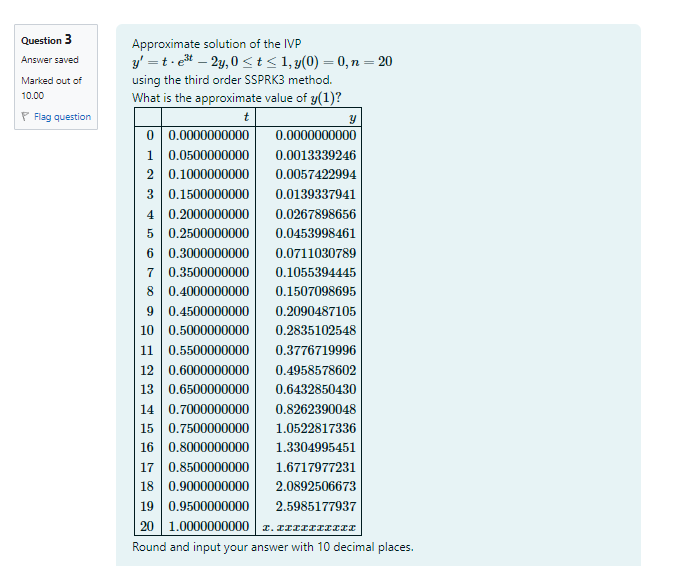

In [21]:
import numpy as np

# Define the function
def f(t, y):
    return t * np.exp(3*t) - 2*y

# Define the third-order SSPRK3 method
def ssprk3_method(f, a, b, y0, n):
    h = (b - a) / n
    t = np.linspace(a, b, n+1)
    y = np.zeros(n+1)
    y[0] = y0

    for i in range(n):
        k1 = f(t[i], y[i])
        k2 = f(t[i] + (1/2)*h, y[i] + (1/2)*h*k1)
        k3 = f(t[i] + h, y[i] - h*k1 + 2*h*k2)
        y[i+1] = y[i] + (h/6)*(k1 + 4*k2 + k3)
        print(i,y[i+1])

    return y[-1]

# Set the initial values
a = 0
b = 1
y0 = 0
n = 21

# Approximate y(1) using the SSPRK3 method
approximation = ssprk3_method(f, a, b, y0, n)

# Print the result
print(approximation)

0 0.0012091300817307182
1 0.005179199493131193
2 0.012512575631567047
3 0.023951243529245787
4 0.04040368981749246
5 0.06297691383611251
6 0.09301449181788995
7 0.1321417848930854
8 0.18231957513567476
9 0.2459076409393753
10 0.3257400494310285
11 0.4252142561426404
12 0.548396468653807
13 0.7001461605990454
14 0.8862631260822138
15 1.11366105474296
16 1.3905722991902185
17 1.7267893164443042
18 2.1339492134919724
19 2.6258689375109947
20 3.218939951151169
3.218939951151169


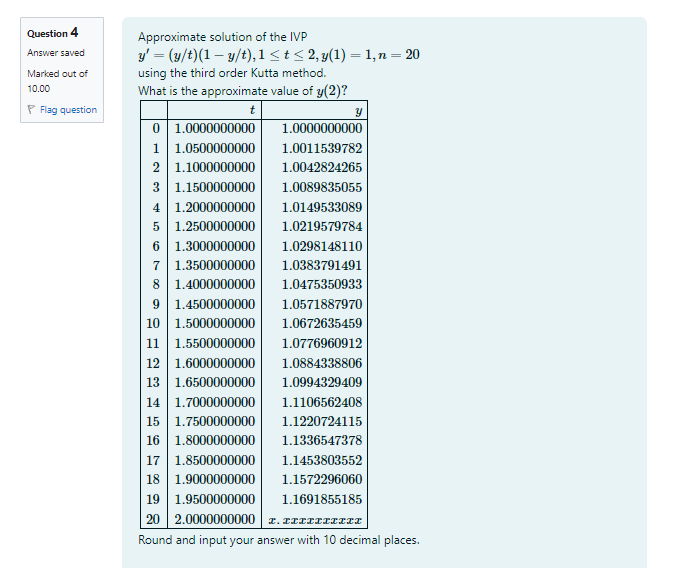

              t            y        exact        error
0  1.0000000000 1.0000000000 0.5000000000 0.5000000000
1  1.0500000000 1.0015047142 0.5250000000 0.4765047142
2  1.1000000000 1.0048979168 0.5500000000 0.4548979168
3  1.1500000000 1.0098019741 0.5750000000 0.4348019741
4  1.2000000000 1.0159294688 0.6000000000 0.4159294688
5  1.2500000000 1.0230580452 0.6250000000 0.3980580452
6  1.3000000000 1.0310131926 0.6500000000 0.3810131926
7  1.3500000000 1.0396561967 0.6750000000 0.3646561967
8  1.4000000000 1.0488755407 0.7000000000 0.3488755407
9  1.4500000000 1.0585806571 0.7250000000 0.3335806571
10 1.5000000000 1.0686973175 0.7500000000 0.3186973175
11 1.5500000000 1.0791641802 0.7750000000 0.3041641802
12 1.6000000000 1.0899301714 0.8000000000 0.2899301714
13 1.6500000000 1.1009524758 0.8250000000 0.2759524758
14 1.7000000000 1.1121949763 0.8500000000 0.2621949763
15 1.7500000000 1.1236270326 0.8750000000 0.2486270326
16 1.8000000000 1.1352225136 0.9000000000 0.2352225136
17 1.85000

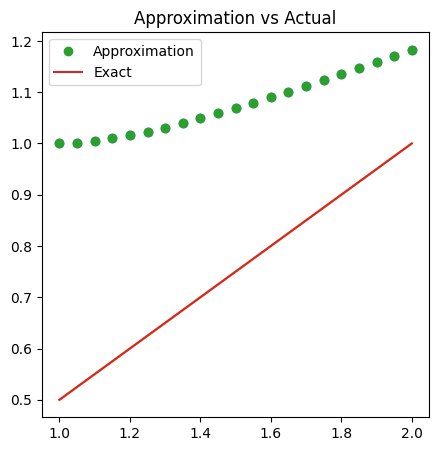

In [22]:
from collections.abc import Callable
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

def RungKutta3(f:Callable[[np.float64,np.float64],np.float64],
               t_span:np.ndarray,
               y_int:np.float64,
               n:np.int64)->pd.DataFrame:
    
    h = (t_span[1]-t_span[0])/n     
    t = np.linspace(start=t_span[0],stop=t_span[1],num=n+1,dtype=np.float64)
    y = np.full_like(a=t,fill_value=np.nan,dtype=np.float64)
    y[0] = y_int 
    
    for i in range(0,n,1):
        k1 = f(t[i],y[i])
        k2 = f(t[i] + 0.5*h , y[i] + 0.5*h*k1)
        k3 = f(t[i] + h , y[i] + h*k2)
        y[i+1] = y[i] + h*(k1 + 2.0*k2 + 2.0*k3 + k3)/6.0 
        
    df = pd.DataFrame(data={'t':t,'y':y},dtype=np.float64)
    return df 


if __name__ == '__main__':
    
    def f(t:np.float64,y:np.float64)->np.float64:
        return y/t * (1-y/t)
    
    t_span = np.array(object=[1,2],dtype=np.float64)
    y_init = 1
    n = 20
    df = RungKutta3(f=f,t_span=t_span,y_int=y_init,n=n)
    
    def y(t:np.float64)->np.float64:
        return t/2
    
    df.loc[:,'exact'] = df.loc[:,'t'].apply(func=y)
    df.loc[:,'error'] = abs(df.loc[:,'y']-df.loc[:,'exact'])
    pd.options.display.float_format = '{:.10f}'.format
    print(df)
    
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(1,1,1)
    ax.plot(df.loc[:,'t'],df.loc[:,'y'],'o')
    ax.plot(df.loc[:,'t'],df.loc[:,'exact'],'-')
  
    plt.title('Approximation vs Actual')
    ax.plot(df.loc[:, 't'], df.loc[:, 'y'], 'o', label='Approximation')
    ax.plot(df.loc[:, 't'], df.loc[:, 'exact'], '-', label='Exact')
    ax.legend()
    plt.show()

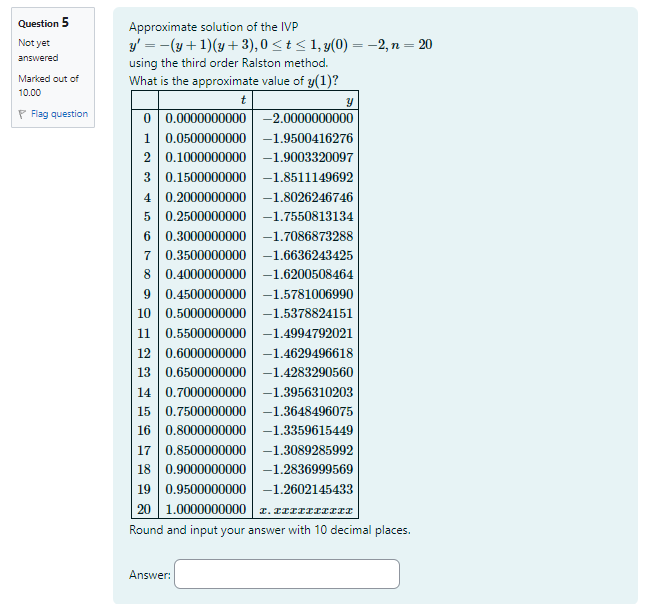

In [23]:
import numpy as np

# Define the function
def f(t, y):
    return -(y+1) * (y+3)

# Define the third-order Ralston method
def ralston_method(f, a, b, y0, n):
    h = (b - a) / n
    t = np.linspace(a, b, n+1)
    y = np.zeros(n+1)
    y[0] = y0

    for i in range(n):
        k1 = f(t[i], y[i])
        k2 = f(t[i] + (2/3)*h, y[i] + (2/3)*h*k1)
        k3 = f(t[i] + (2/3)*h, y[i] + (2/3)*h*k1)
        y[i+1] = y[i] + (h/4)*(k1 + 3*k3)
        print(i,y[i])
        
    return y[-1]

# Set the initial values
a = 0
b = 1
y0 = -2
n = 21

# Approximate y(2) using the Ralston method
approximation = ralston_method(f, a, b, y0, n)

# Print the result
print(round(approximation,10))

0 -2.0
1 -1.9524169456142246
2 -1.9050491987372866
3 -1.8581081819579277
4 -1.8117976931047792
5 -1.7663104525550193
6 -1.7218250583323176
7 -1.6785034442220603
8 -1.6364889061820782
9 -1.5959047304227014
10 -1.556853425275189
11 -1.5194165306432441
12 -1.4836549551871947
13 -1.449609773527805
14 -1.417303404117675
15 -1.386741082857399
16 -1.357912547402348
17 -1.3307938514648232
18 -1.3053492361510073
19 -1.281532995341346
20 -1.259291283266579
-1.2385638238


In [24]:
import numpy as np

# Define the function
def f(t, y):
    return 2*y/t + t**2 * np.exp(t)

# Define the third-order Kutta method
def kutta_method(f, a, b, y0, n):
    h = (b - a) / n
    t = np.linspace(a, b, n+1)
    y = np.zeros(n+1)
    y[0] = y0

    for i in range(n):
        k1 = f(t[i], y[i])
        k2 = f(t[i] + (1/2)*h, y[i] + (1/2)*h*k1)
        k3 = f(t[i] + h, y[i] - h*k1 + 2*h*k2)
        y[i+1] = y[i] + (h/6)*(k1 + 4*k2 + k3)

    return y[-1]

# Set the initial values
a = 1
b = 2
y0 = 0
n = 20

# Approximate y(2) using the Kutta method
approximation = kutta_method(f, a, b, y0, n)

# Print the result
print(approximation)


18.682111918944937


In [25]:
import numpy as np

# Define the function
def f(t, y):
    return 2*y/t + t**2 * np.exp(t)

# Define the third-order Kutta method
def kutta_method(f, a, b, y0, n):
    h = (b - a) / n
    t = np.linspace(a, b, n+1)
    y = np.zeros(n+1)
    y[0] = y0

    for i in range(n):
        k1 = f(t[i], y[i])
        k2 = f(t[i] + (1/2)*h, y[i] + (1/2)*h*k1)
        k3 = f(t[i] + h, y[i] - h*k1 + 2*h*k2)
        y[i+1] = y[i] + (h/6)*(k1 + 4*k2 + k3)

    return y[-1]

# Set the initial values
a = 1
b = 2
y0 = 0
n = 20

# Approximate y(2) using the Kutta method
approximation = kutta_method(f, a, b, y0, n)

# Print the result
print(approximation)


18.682111918944937


In [26]:
import numpy as np

# Define the function
def f(t, y):
    return 2*(1 + t**3) * y**3 - t*y

# Define the third-order SSPRK3 method
def ssprk3_method(f, a, b, y0, n):
    h = (b - a) / n
    t = np.linspace(a, b, n+1)
    y = np.zeros(n+1)
    y[0] = y0

    for i in range(n):
        k1 = f(t[i], y[i])
        k2 = f(t[i] + (1/2)*h, y[i] + (1/2)*h*k1)
        k3 = f(t[i] + h, y[i] - h*k1 + 2*h*k2)
        y[i+1] = y[i] + (h/6)*(k1 + 4*k2 + k3)
        print(i,y[i+1])

    return y[-1]

# Set the initial values
a = 0
b = 1
y0 = 1/3
n = 21

# Approximate y(1) using the SSPRK3 method
approximation = ssprk3_method(f, a, b, y0, n)

# Print the result
print(approximation)

0 0.3365333121479377
1 0.33905807091954604
2 0.34088100455454273
3 0.3419812961894156
4 0.34234444869671704
5 0.3419626303733133
6 0.34083481564470514
7 0.33896671510341264
8 0.33637050331538876
9 0.33306436611860407
10 0.3290719002671695
11 0.3244214062214507
12 0.3191451190688563
13 0.3132784228817996
14 0.30685909061634087
15 0.2999265855931807
16 0.2925214525341525
17 0.2846848169480181
18 0.2764580021927976
19 0.26788226446536645
20 0.2589986377849357
0.2589986377849357


In [27]:
import numpy as np

# Define the function
def f(t, y):
    return 2*(1 - t*y) / (t**2 + 1)

# Define the third-order Kutta method
def kutta_method(f, a, b, y0, n):
    h = (b - a) / n
    t = np.linspace(a, b, n+1)
    y = np.zeros(n+1)
    y[0] = y0

    for i in range(n):
        k1 = f(t[i], y[i])
        k2 = f(t[i] + (1/2)*h, y[i] + (1/2)*h*k1)
        k3 = f(t[i] + h, y[i] - h*k1 + 2*h*k2)
        y[i+1] = y[i] + (h/6)*(k1 + 4*k2 + k3)

        print(i+1,y[i+1])

    return y[-1]

# Set the initial values
a = 0
b = 1
y0 = 1
n = 20

# Approximate y(1) using the Kutta method
approximation = kutta_method(f, a, b, y0, n)

# Print the result
print(approximation)


1 1.097257974156842
2 1.1881213111213926
3 1.2713977191831383
4 1.346159608517069
5 1.4117721761181827
6 1.4678990259889346
7 1.514487249939434
8 1.5517361078268361
9 1.580054667291019
10 1.6000139706172918
11 1.6122986878553283
12 1.6176621014231756
13 1.6168869664315109
14 1.6107535558506139
15 1.6000151871985315
16 1.5853808018920634
17 1.5675037246142927
18 1.5469755220039685
19 1.5243238455320771
20 1.500013221370357
1.500013221370357


In [28]:
import numpy as np

# Define the function
def f(t, y):
    return 1 + y/t

# Define the third-order Wray method
def wray_method(f, a, b, y0, n):
    h = (b - a) / n
    t = np.linspace(a, b, n+1)
    y = np.zeros(n+1)
    y[0] = y0

    for i in range(n):
        k1 = f(t[i], y[i])
        k2 = f(t[i] + (1/2)*h, y[i] + (1/2)*h*k1)
        k3 = f(t[i+1], y[i] + h*(2*k2 - k1))
        y[i+1] = y[i] + (h/3)*(k1 + 4*k2 + k3)
        print(i,y[i])

    return y[-1]

# Set the initial values
a = 1
b = 2
y0 = 2
n = 21

# Approximate y(2) using the Wray method
approximation = wray_method(f, a, b, y0, n)

# Print the result
print(approximation)


0 2.0
1 2.287945904224974
2 2.5933108200289623
3 2.916094618239685
4 3.256297190491761
5 3.6139184452015227
6 3.9889583044410317
7 4.381416701485451
8 4.79129357887048
9 5.2185888868402905
10 5.663302582097381
11 6.1254346267879995
12 6.604984987672946
13 7.101953635445414
14 7.616340544166329
15 8.14814569079425
16 8.69736905479185
17 9.264010617794815
18 9.848070363331924
19 10.449548276587288
20 11.068444344197546
11.704758554078158


In [29]:
import numpy as np

# Define the function
def f(t, y):
    return 1 + y/t

# Define the third-order Wray method
def wray_method(f, a, b, y0, n):
    h = (b - a) / n
    t = np.linspace(a, b, n+1)
    y = np.zeros(n+1)
    y[0] = y0

    for i in range(n):
        k1 = f(t[i], y[i])
        k2 = f(t[i] + (8/15)*h, y[i] + (8/15)*h*k1)
        k3 = f(t[i] + h, y[i] - h*k1 + 2*h*k2)
        y[i+1] = y[i] + (h/3) * (k1 + 4*k2 + k3)

    return y[-1]

# Set the initial values
a = 1
b = 2
y0 = 2
n = 20

# Approximate y(2) using the Wray method
approximation = wray_method(f, a, b, y0, n)

# Print the result
print(approximation)


11.693867540305579


In [30]:
import numpy as np
import matplotlib.pyplot as plt

def f(t, y):
    return t**(-2) * (np.sin(2 * t) - 2 * t * y)

def SSPRK3(f, a, b, y0, n):
    h = (b - a) / n
    t = a
    y = y0

    for _ in range(n):
        k1 = f(t, y)
        k2 = f(t + h/2, y + (h/2) * k1)
        k3 = f(t + h, y + h * (-k1 + 2 * k2))
        
        y = y + (h/6) * (k1 + 4 * k2 + k3)
        t = t + h
        print(t,y)
    
    return y

a = 1
b = 2
y0 = 2
n = 20

approx_y2 = SSPRK3(f, a, b, y0, n)
print(round(approx_y2, 10))


1.05 1.8542819137074482
1.1 1.724107575891199
1.1500000000000001 1.6068468791468706
1.2000000000000002 1.5004247506327635
1.2500000000000002 1.4031902204066318
1.3000000000000003 1.3138199310200558
1.3500000000000003 1.2312460840611124
1.4000000000000004 1.1546019759516684
1.4500000000000004 1.0831803630092964
1.5000000000000004 1.0164012996484229
1.5500000000000005 0.953787052166768
1.6000000000000005 0.8949423544035514
1.6500000000000006 0.8395387373495219
1.7000000000000006 0.7873019956230104
1.7500000000000007 0.7380020913825422
1.8000000000000007 0.6914449687824387
1.8500000000000008 0.6474658785799735
1.9000000000000008 0.605923906113606
1.9500000000000008 0.5666974657448222
2.000000000000001 0.5296805774346562
0.5296805774


# Quiz 03

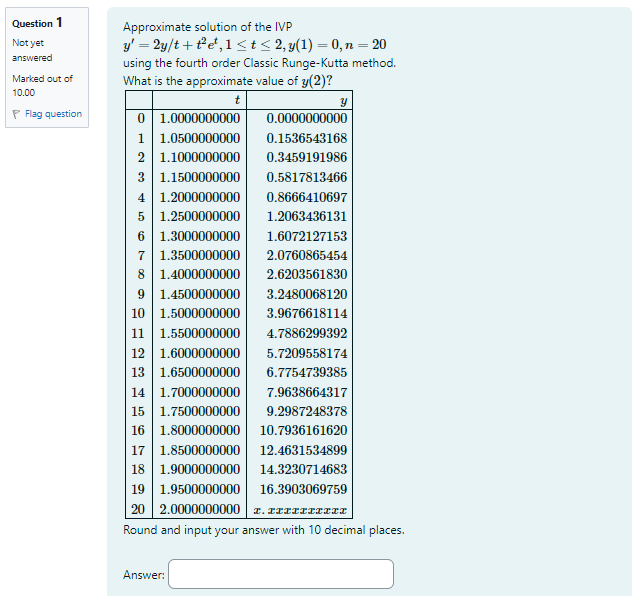

              t             y  exact         error
0  1.0000000000  0.0000000000      0  0.0000000000
1  1.0500000000  0.1536543168      0  0.1536543168
2  1.1000000000  0.3459191986      0  0.3459191986
3  1.1500000000  0.5817813466      0  0.5817813466
4  1.2000000000  0.8666410697      0  0.8666410697
5  1.2500000000  1.2063436131      0  1.2063436131
6  1.3000000000  1.6072127153      0  1.6072127153
7  1.3500000000  2.0760865454      0  2.0760865454
8  1.4000000000  2.6203561830      0  2.6203561830
9  1.4500000000  3.2480068120      0  3.2480068120
10 1.5000000000  3.9676618114      0  3.9676618114
11 1.5500000000  4.7886299392      0  4.7886299392
12 1.6000000000  5.7209558174      0  5.7209558174
13 1.6500000000  6.7754739385      0  6.7754739385
14 1.7000000000  7.9638664317      0  7.9638664317
15 1.7500000000  9.2987248378      0  9.2987248378
16 1.8000000000 10.7936161620      0 10.7936161620
17 1.8500000000 12.4631534899      0 12.4631534899
18 1.9000000000 14.3230714683  

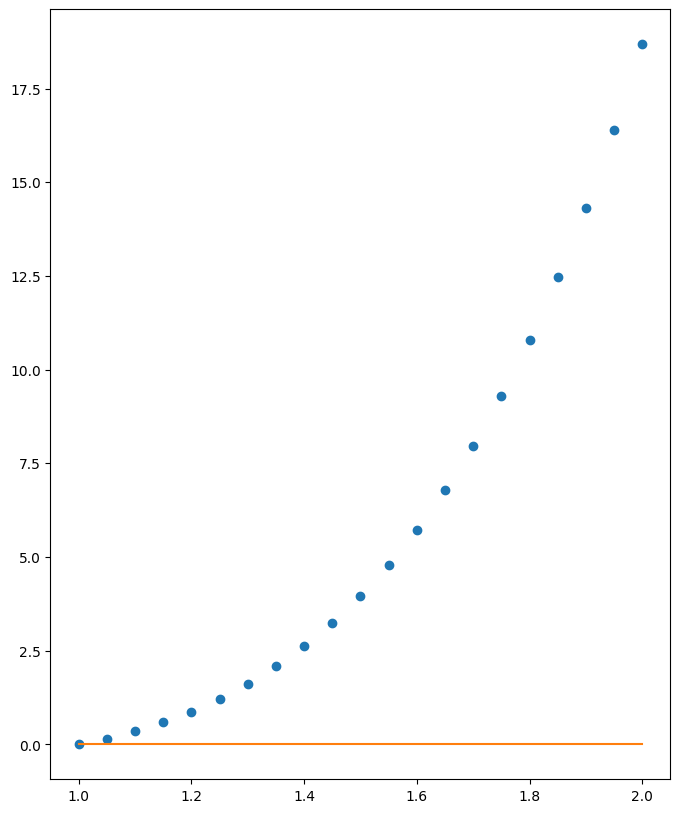

In [31]:
from collections.abc import Callable

def RungKutta40(f:Callable[[np.float64,np.float64],np.float64],t_span:np.ndarray,y_int:np.float64,n:np.int64)->pd.DataFrame:
    
    h = (t_span[1]-t_span[0])/n     
    t = np.linspace(start=t_span[0],stop=t_span[1],num=n+1,dtype=np.float64)
    y = np.full_like(a=t,fill_value=np.nan,dtype=np.float64)
    y[0] = y_int 
    
    for i in range(0,n,1):
        k1 = f(t[i],y[i])
        k2 = f(t[i] + 0.5*h , y[i] + 0.5*h*k1)
        k3 = f(t[i] + 0.5*h , y[i] + 0.5*h*k2)
        k4 = f(t[i] + h , y[i] + h*k3)
        
        y[i+1] = y[i] + h*(k1 + 2.0*k2 + 2.0*k3 + k4)/6.0 
    df = pd.DataFrame(data={'t':t,'y':y},dtype=np.float64)
    
    return df 

if __name__ == '__main__':
    
    def f(t:np.float64,y:np.float64)->np.float64:
        return 2*y/t + t**2 * np.exp(t)
    
    t_span = np.array(object=[1,2],dtype=np.float64)
    y_init = 0.0 
    n = 20 
    
    df = RungKutta40(f=f,t_span=t_span,y_int=y_init,n=n)
    
    def y(t:np.float64)->np.float64:
        return 0
    
    df.loc[:,'exact'] = df.loc[:,'t'].apply(func=y)
    df.loc[:,'error'] = abs(df.loc[:,'y']-df.loc[:,'exact'])
    pd.options.display.float_format = '{:.10f}'.format
    
    print(df)
    
    fig = plt.figure(figsize=(8,10))
    ax = fig.add_subplot(1,1,1)
    ax.plot(df.loc[:,'t'],df.loc[:,'y'],'o')
    ax.plot(df.loc[:,'t'],df.loc[:,'exact'],'-')
    plt.show()

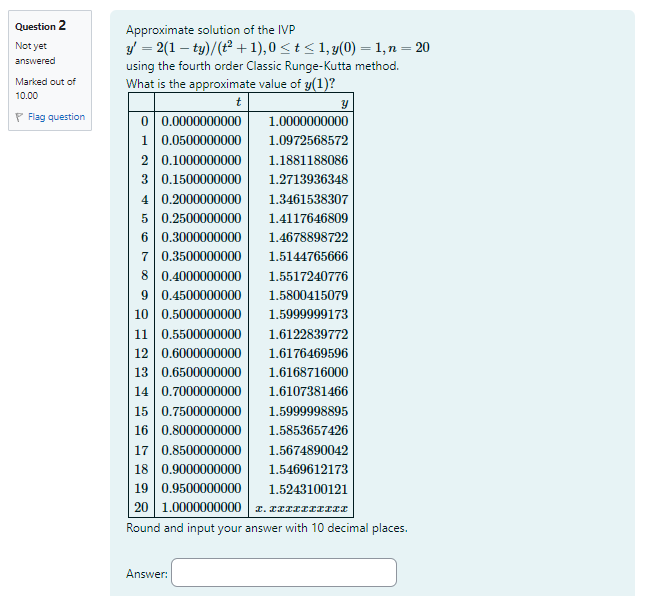

              t            y  exact        error
0  0.0000000000 1.0000000000      1 0.0000000000
1  0.0500000000 1.0972568572      1 0.0972568572
2  0.1000000000 1.1881188086      1 0.1881188086
3  0.1500000000 1.2713936348      1 0.2713936348
4  0.2000000000 1.3461538307      1 0.3461538307
5  0.2500000000 1.4117646809      1 0.4117646809
6  0.3000000000 1.4678898722      1 0.4678898722
7  0.3500000000 1.5144765666      1 0.5144765666
8  0.4000000000 1.5517240776      1 0.5517240776
9  0.4500000000 1.5800415079      1 0.5800415079
10 0.5000000000 1.5999999173      1 0.5999999173
11 0.5500000000 1.6122839772      1 0.6122839772
12 0.6000000000 1.6176469596      1 0.6176469596
13 0.6500000000 1.6168716000      1 0.6168716000
14 0.7000000000 1.6107381466      1 0.6107381466
15 0.7500000000 1.5999998895      1 0.5999998895
16 0.8000000000 1.5853657426      1 0.5853657426
17 0.8500000000 1.5674890042      1 0.5674890042
18 0.9000000000 1.5469612173      1 0.5469612173
19 0.9500000000 1.52

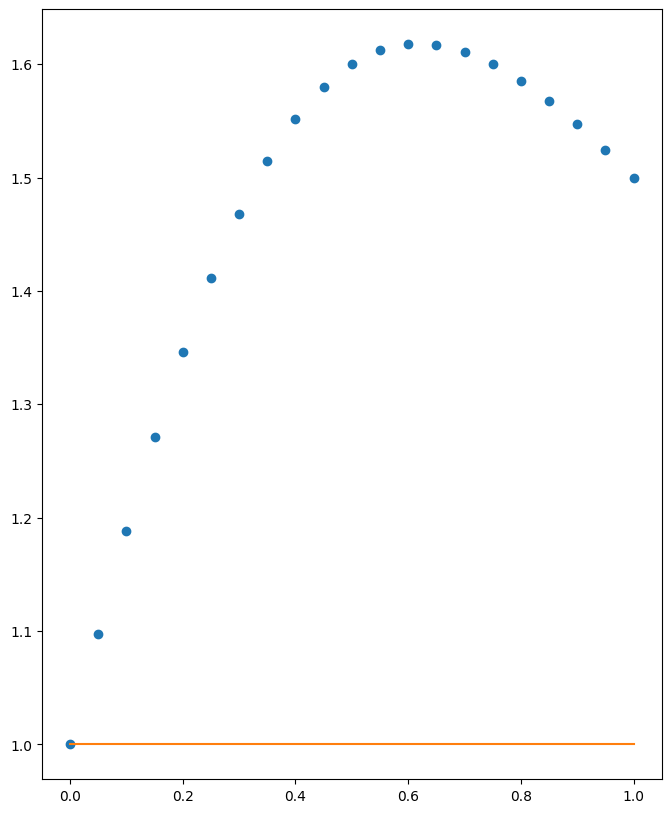

In [32]:
from collections.abc import Callable


def RungKutta40(f: Callable[[np.float64, np.float64], np.float64], t_span: np.ndarray, y_int: np.float64, n: np.int64) -> pd.DataFrame:

    h = (t_span[1]-t_span[0])/n
    t = np.linspace(start=t_span[0], stop=t_span[1], num=n+1, dtype=np.float64)
    y = np.full_like(a=t, fill_value=np.nan, dtype=np.float64)
    y[0] = y_int

    for i in range(0, n, 1):
        k1 = f(t[i], y[i])
        k2 = f(t[i] + 0.5*h, y[i] + 0.5*h*k1)
        k3 = f(t[i] + 0.5*h, y[i] + 0.5*h*k2)
        k4 = f(t[i] + h, y[i] + h*k3)

        y[i+1] = y[i] + h*(k1 + 2.0*k2 + 2.0*k3 + k4)/6.0
    df = pd.DataFrame(data={'t': t, 'y': y}, dtype=np.float64)

    return df


if __name__ == '__main__':

    def f(t: np.float64, y: np.float64) -> np.float64:
        return 2*(1-t*y)/(t**2 + 1)

    t_span = np.array(object=[0, 1], dtype=np.float64)
    y_init = 1
    n = 20

    df = RungKutta40(f=f, t_span=t_span, y_int=y_init, n=n)

    def y(t: np.float64) -> np.float64:
        return 1

    df.loc[:, 'exact'] = df.loc[:, 't'].apply(func=y)
    df.loc[:, 'error'] = abs(df.loc[:, 'y']-df.loc[:, 'exact'])
    pd.options.display.float_format = '{:.10f}'.format

    print(df)

    fig = plt.figure(figsize=(8, 10))
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(df.loc[:, 't'], df.loc[:, 'y'], 'o')
    ax.plot(df.loc[:, 't'], df.loc[:, 'exact'], '-')
    plt.show()


# Quiz 4

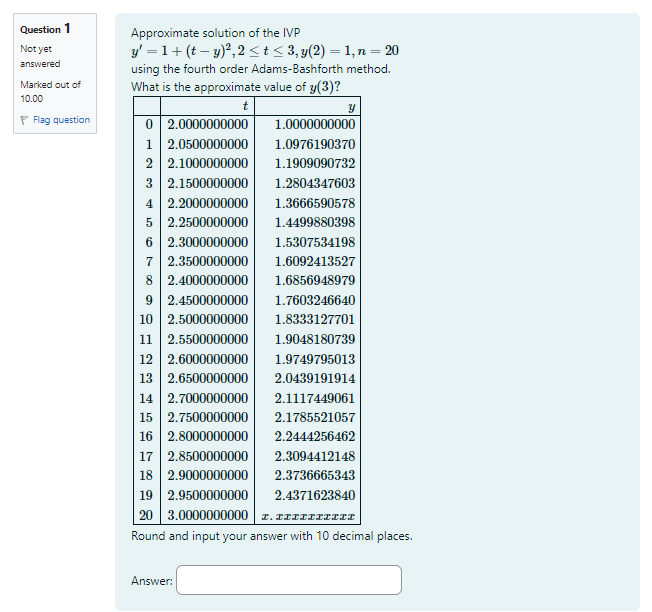

              t            y        exact        error
0  2.0000000000 1.0000000000 3.9557787086 2.9557787086
1  2.0500000000 1.0976190370 3.7858486148 2.6882295779
2  2.1000000000 1.1909090732 3.6510731966 2.4601641235
3  2.1500000000 1.2804347603 3.5429156688 2.2624809085
4  2.2000000000 1.3666673488 3.4553698139 2.0887024652
5  2.2500000000 1.4500011535 3.3840839855 1.9340828320
6  2.3000000000 1.5307707014 3.3258251604 1.7950544590
7  2.3500000000 1.6092609378 3.2781383572 1.6688774194
8  2.4000000000 1.6857160936 3.2391230509 1.5534069573
9  2.4500000000 1.7603467087 3.2072821917 1.4469354830
10 2.5000000000 1.8333352476 3.1814176868 1.3480824391
11 2.5500000000 1.9048406285 3.1605564284 1.2557157999
12 2.6000000000 1.9750019031 3.1438968826 1.1688949795
13 2.6500000000 2.0439412671 3.1307698080 1.0868285409
14 2.7000000000 2.1117665393 3.1206088634 1.0088423241
15 2.7500000000 2.1785732157 3.1129282463 0.9343550306
16 2.8000000000 2.2444461811 3.1073053958 0.8628592147
17 2.85000

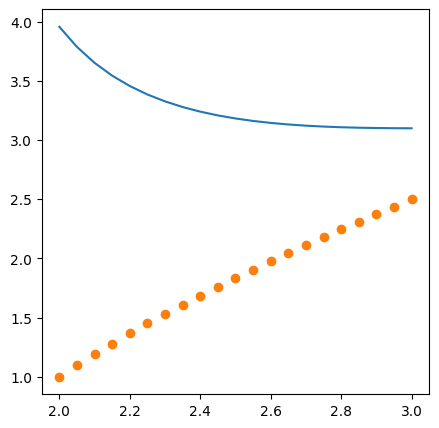

In [33]:
def Adams_Predictor_Corrector(f: Callable[[np.float64, np.float64], np.float64],
                              t_span: list or tuple or np.ndarray,
                              y_init: float or np.float64,
                              n: int or np.int64) -> pd.DataFrame:

    h = (t_span[1] - t_span[0]) / n
    t = np.linspace(start=t_span[0], stop=t_span[1], num=n + 1, dtype=np.float64)
    y = np.full_like(a=t, fill_value=np.nan, dtype=np.float64)
    y[0] = y_init

    # TODO: y[0], y[1], and y[2] using one-step, Runge-Kutta method of order four
    for i in range(0, 3, 1):
        k1 = f(t[i], y[i])
        k2 = f(t[i] + 0.5 * h, y[i] + 0.5 * h * k1)
        k3 = f(t[i] + 0.5 * h, y[i] + 0.5 * h * k2)
        k4 = f(t[i] + h, y[i] + h * k3) 
        
        y[i + 1] = y[i] + h * (k1 + 2.0 * k2 + 2.0 * k3 + k4) / 6.0
        t[i + 1] = t[i] + h

    # TODO: apply predictor corrector method
    for i in range(3, n, 1):
        
        # TODO: predictor
        yp = y[i] + h * (55 * f(t[i], y[i]) - 59 * f(t[i - 1], y[i - 1]) + 37 * f(t[i - 2], y[i - 2]) - 9 * f(t[i - 3], y[i - 3])) / 24
       
        # TODO: corrector
        y[i + 1] = y[i] + h * (9 * f(t[i + 1], yp) + 19 * f(t[i], y[i]) - 5 * f(t[i - 1], y[i - 1]) + f(t[i - 2], y[i - 2])) / 24

    df = pd.DataFrame(data={'t': t, 'y': y}, dtype=np.float64)
    return df


if __name__ == '__main__':
    def f(t: float, y: float) -> float:
        return 1 + (t-y)**2 

    df = Adams_Predictor_Corrector(f=f, t_span=[2,3], y_init=1, n=20)

    def y(t):
        return t - np.tan(t + (2 - np.tan(2) - 1))

    df.loc[:, 'exact'] = df.loc[:, 't'].apply(y)
    df.loc[:, 'error'] = abs(df.loc[:, 'y'] - df.loc[:, 'exact'])
    print(df)

    fig = plt.figure(figsize=(5, 5))
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(df['t'], df['exact'], '-')
    ax.plot(df['t'], df['y'], 'o')
    plt.show()
    

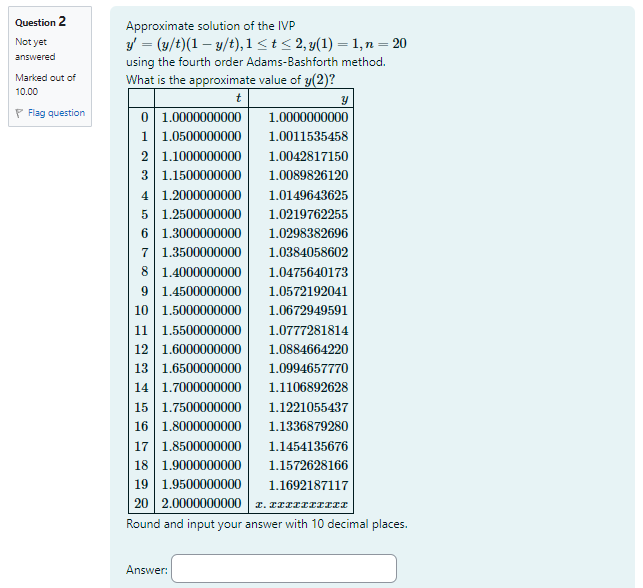

In [34]:
def f(t, y):
    return 1 + (t - y)**2

def adams_bashforth(t0, y0, h, n):
    # Initialize the arrays to store t and y values
    t = [t0 + i * h for i in range(n+1)]
    y = [0] * (n+1)

    # Compute the values of y using the Runge-Kutta method for the first four points
    y[0] = y0
    y[1] = y[0] + h * f(t[0], y[0])
    y[2] = y[1] + h * f(t[1], y[1])

    # Apply the Adams-Bashforth method iteratively
    for i in range(3, n+1):
        y[i] = y[i-1] + (h / 24) * (55 * f(t[i-1], y[i-1]) - 59 * f(t[i-2], y[i-2]) + 37 * f(t[i-3], y[i-3]) - 9 * f(t[i-4], y[i-4]))
        print(i,y[i])

    # Return the approximate value of y(3)
    return y[n]

# Set up the problem parameters
t0 = 2
y0 = 1
h = 1 / 20
n = 21

# Approximate the value of y(3)
approx_y = adams_bashforth(t0, y0, h, n)

print("Approximate value of y(3):", approx_y)


3 1.130674858561198
4 1.2499033559495998
5 1.3218163835556644
6 1.424316843364175
7 1.5063861568999246
8 1.5931621252235224
9 1.6732320901345321
10 1.752831960945404
11 1.8294714253040485
12 1.9046428376266633
13 1.9779521508031794
14 2.0498219754198392
15 2.120282029281865
16 2.1895072306787857
17 2.257587790868394
18 2.324630624424416
19 2.3907194041970214
20 2.4559333365629237
21 2.520341365788003
Approximate value of y(3): 2.520341365788003


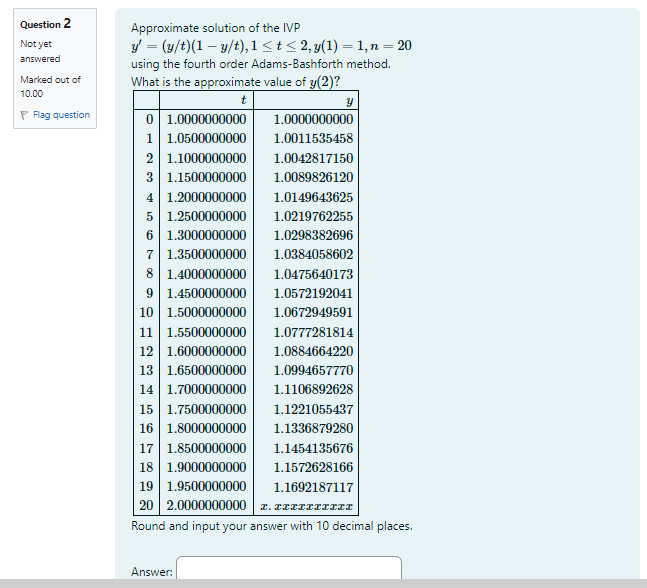

              t            y        exact        error
0  1.0000000000 1.0000000000 0.5000000000 0.5000000000
1  1.0500000000 1.0011535458 0.5250000000 0.4761535458
2  1.1000000000 1.0042817150 0.5500000000 0.4542817150
3  1.1500000000 1.0089826120 0.5750000000 0.4339826120
4  1.2000000000 1.0149515044 0.6000000000 0.4149515044
5  1.2500000000 1.0219555926 0.6250000000 0.3969555926
6  1.3000000000 1.0298120444 0.6500000000 0.3798120444
7  1.3500000000 1.0383761312 0.6750000000 0.3633761312
8  1.4000000000 1.0475319087 0.7000000000 0.3475319087
9  1.4500000000 1.0571855020 0.7250000000 0.3321855020
10 1.5000000000 1.0672601782 0.7500000000 0.3172601782
11 1.5500000000 1.0776926766 0.7750000000 0.3026926766
12 1.6000000000 1.0884304367 0.8000000000 0.2884304367
13 1.6500000000 1.0994294798 0.8250000000 0.2744294798
14 1.7000000000 1.1106527707 0.8500000000 0.2606527707
15 1.7500000000 1.1220689380 0.8750000000 0.2470689380
16 1.8000000000 1.1336512648 0.9000000000 0.2336512648
17 1.85000

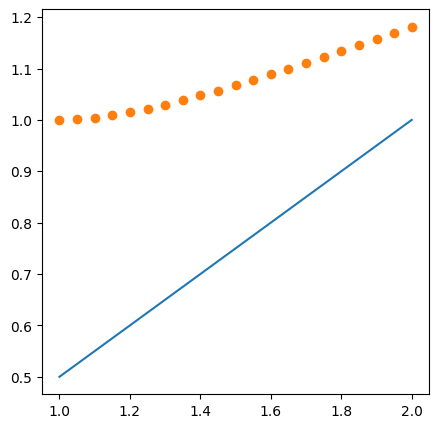

In [35]:
def Adams_Predictor_Corrector(f: Callable[[np.float64, np.float64], np.float64],
                              t_span: list or tuple or np.ndarray,
                              y_init: float or np.float64,
                              n: int or np.int64) -> pd.DataFrame:

    h = (t_span[1] - t_span[0]) / n
    t = np.linspace(start=t_span[0], stop=t_span[1], num=n + 1, dtype=np.float64)
    y = np.full_like(a=t, fill_value=np.nan, dtype=np.float64)
    y[0] = y_init

    # TODO: y[0], y[1], and y[2] using one-step, Runge-Kutta method of order four
    for i in range(0, 3, 1):
        k1 = f(t[i], y[i])
        k2 = f(t[i] + 0.5 * h, y[i] + 0.5 * h * k1)
        k3 = f(t[i] + 0.5 * h, y[i] + 0.5 * h * k2)
        k4 = f(t[i] + h, y[i] + h * k3) 
        
        y[i + 1] = y[i] + h * (k1 + 2.0 * k2 + 2.0 * k3 + k4) / 6.0
        t[i + 1] = t[i] + h

    # TODO: apply predictor corrector method
    for i in range(3, n, 1):
        
        # TODO: predictor
        yp = y[i] + h * (55 * f(t[i], y[i]) - 59 * f(t[i - 1], y[i - 1]) + 37 * f(t[i - 2], y[i - 2]) - 9 * f(t[i - 3], y[i - 3])) / 24
       
        # TODO: corrector
        y[i + 1] = y[i] + h * (9 * f(t[i + 1], yp) + 19 * f(t[i], y[i]) - 5 * f(t[i - 1], y[i - 1]) + f(t[i - 2], y[i - 2])) / 24

    df = pd.DataFrame(data={'t': t, 'y': y}, dtype=np.float64)
    return df


if __name__ == '__main__':
    def f(t: float, y: float) -> float:
        return (y/t)*(1-y/t) 

    df = Adams_Predictor_Corrector(f=f, t_span=[1,2], y_init=1, n=20)

    def y(t):
        return t/2

    df.loc[:, 'exact'] = df.loc[:, 't'].apply(y)
    df.loc[:, 'error'] = abs(df.loc[:, 'y'] - df.loc[:, 'exact'])
    print(df)

    fig = plt.figure(figsize=(5, 5))
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(df['t'], df['exact'], '-')
    ax.plot(df['t'], df['y'], 'o')
    plt.show()
    

In [36]:
def f(t, y):
    return -(y + 1) * (y + 3)

def adams_bashforth(t0, y0, h, n):

# Initialize the arrays to store t and y values
    t = [t0 + i * h for i in range(n+1)]
    y = [0] * (n+1)

# Compute the values of y using the Runge-Kutta method for the first four points
    y[0] = y0
    y[1] = y[0] + h * f(t[0], y[0])
    y[2] = y[1] + h * f(t[1], y[1])
    y[3] = y[2] + h * f(t[2], y[2])

    # Apply the Adams-Bashforth method iteratively
    for i in range(0, n+1):
        y[i] = y[i-1] + (h / 24) * (55 * f(t[i-1], y[i-1]) - 59 * f(t[i-2], y[i-2]) + 37 * f(t[i-3], y[i-3]) - 9 * f(t[i-4], y[i-4]))
        print(i,y[i])
    # Return the approximate value of y(1)
    return y[n]

# Set up the problem parameters
t0 = 0
y0 = -2
h = 1/20
n = 20

# Approximate the value of y(1)
approx_y = adams_bashforth(t0, y0, h, n)

print("Approximate value of y(1):", approx_y)


0 -0.15
1 -0.23382812499999994
2 -0.35390618762969966
3 -0.41978002871592573
4 -0.4991264923986158
5 -0.5506835916449412
6 -0.6061622046686652
7 -0.6474031944594861
8 -0.6879132541717545
9 -0.720669938991734
10 -0.7511951210143809
11 -0.7771144912539777
12 -0.8006595008777526
13 -0.8211872430280774
14 -0.8396399976286311
15 -0.8559524636579522
16 -0.8705695484974327
17 -0.8835874517444883
18 -0.8952518195502918
19 -0.9056843437031195
20 -0.9150421717198951
Approximate value of y(1): -0.9150421717198951


# Quiz 5

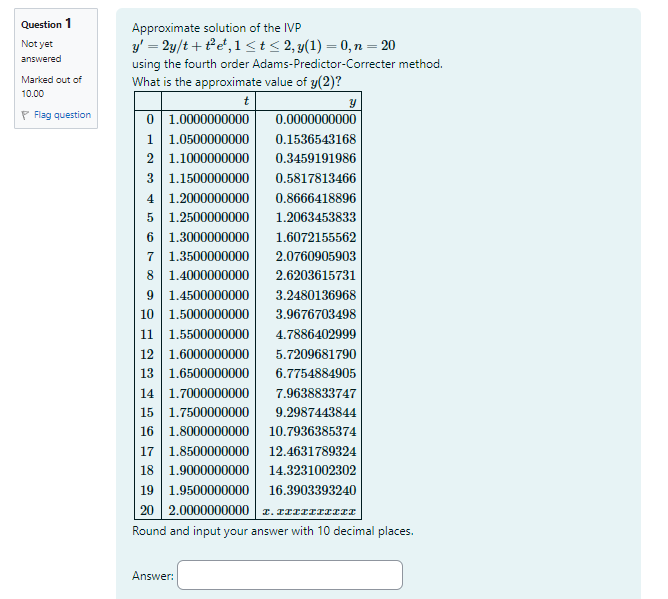

              t             y  exact         error
0  1.0000000000  0.0000000000      0  0.0000000000
1  1.0500000000  0.1536543168      0  0.1536543168
2  1.1000000000  0.3459191986      0  0.3459191986
3  1.1500000000  0.5817813466      0  0.5817813466
4  1.2000000000  0.8666418896      0  0.8666418896
5  1.2500000000  1.2063453833      0  1.2063453833
6  1.3000000000  1.6072155562      0  1.6072155562
7  1.3500000000  2.0760905903      0  2.0760905903
8  1.4000000000  2.6203615731      0  2.6203615731
9  1.4500000000  3.2480136968      0  3.2480136968
10 1.5000000000  3.9676703498      0  3.9676703498
11 1.5500000000  4.7886402999      0  4.7886402999
12 1.6000000000  5.7209681790      0  5.7209681790
13 1.6500000000  6.7754884905      0  6.7754884905
14 1.7000000000  7.9638833747      0  7.9638833747
15 1.7500000000  9.2987443844      0  9.2987443844
16 1.8000000000 10.7936385374      0 10.7936385374
17 1.8500000000 12.4631789324      0 12.4631789324
18 1.9000000000 14.3231002302  

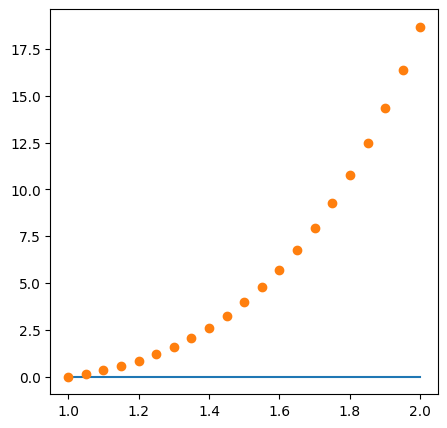

In [37]:
def Adams_Predictor_Corrector(f: Callable[[np.float64, np.float64], np.float64],
                              t_span: list or tuple or np.ndarray,
                              y_init: float or np.float64,
                              n: int or np.int64) -> pd.DataFrame:

    h = (t_span[1] - t_span[0]) / n
    t = np.linspace(start=t_span[0], stop=t_span[1], num=n + 1, dtype=np.float64)
    y = np.full_like(a=t, fill_value=np.nan, dtype=np.float64)
    y[0] = y_init

    # TODO: y[0], y[1], and y[2] using one-step, Runge-Kutta method of order four
    for i in range(0, 3, 1):
        k1 = f(t[i], y[i])
        k2 = f(t[i] + 0.5 * h, y[i] + 0.5 * h * k1)
        k3 = f(t[i] + 0.5 * h, y[i] + 0.5 * h * k2)
        k4 = f(t[i] + h, y[i] + h * k3) 
        
        y[i + 1] = y[i] + h * (k1 + 2.0 * k2 + 2.0 * k3 + k4) / 6.0
        t[i + 1] = t[i] + h

    # TODO: apply predictor corrector method
    for i in range(3, n, 1):
        
        # TODO: predictor
        yp = y[i] + h * (55 * f(t[i], y[i]) - 59 * f(t[i - 1], y[i - 1]) + 37 * f(t[i - 2], y[i - 2]) - 9 * f(t[i - 3], y[i - 3])) / 24
       
        # TODO: corrector
        y[i + 1] = y[i] + h * (9 * f(t[i + 1], yp) + 19 * f(t[i], y[i]) - 5 * f(t[i - 1], y[i - 1]) + f(t[i - 2], y[i - 2])) / 24

    df = pd.DataFrame(data={'t': t, 'y': y}, dtype=np.float64)
    return df


if __name__ == '__main__':
    def f(t: float, y: float) -> float:
        return 2*y/t + t**2 * np.exp(t)

    df = Adams_Predictor_Corrector(f=f, t_span=[1,2], y_init=0, n=20)

    def y(t):
        return 0

    df.loc[:, 'exact'] = df.loc[:, 't'].apply(y)
    df.loc[:, 'error'] = abs(df.loc[:, 'y'] - df.loc[:, 'exact'])
    print(df)

    fig = plt.figure(figsize=(5, 5))
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(df['t'], df['exact'], '-')
    ax.plot(df['t'], df['y'], 'o')
    plt.show()
    

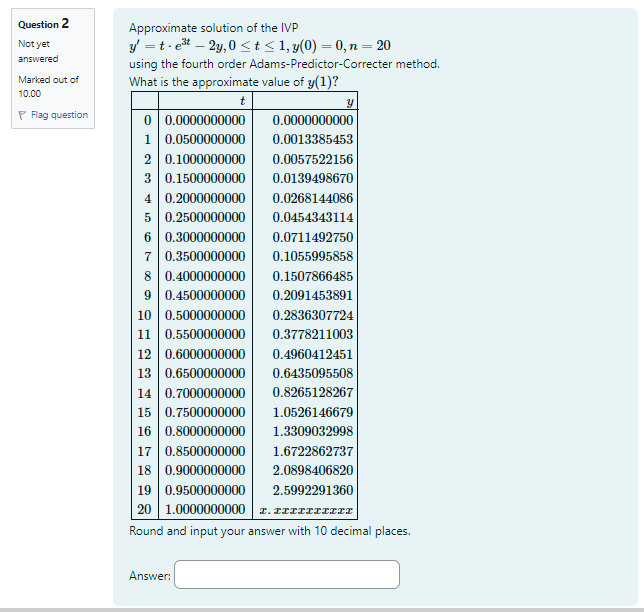

              t            y        exact        error
0  0.0000000000 0.0000000000 0.0000000000 0.0000000000
1  0.0500000000 0.0013385453 0.0322195471 0.0308810018
2  0.1000000000 0.0057522156 0.0665130172 0.0607608015
3  0.1500000000 0.0139498670 0.1030985264 0.0891486594
4  0.2000000000 0.0268144086 0.1422171308 0.1154027223
5  0.2500000000 0.0454343114 0.1841352383 0.1387009268
6  0.3000000000 0.0711492750 0.2291472751 0.1579980000
7  0.3500000000 0.1055995858 0.2775786327 0.1719790468
8  0.4000000000 0.1507866485 0.3297889241 0.1790022756
9  0.4500000000 0.2091453891 0.3861755833 0.1770301942
10 0.5000000000 0.2836307724 0.4471778428 0.1635470704
11 0.5500000000 0.3778211003 0.5132811295 0.1354600292
12 0.6000000000 0.4960412451 0.5850219230 0.0889806780
13 0.6500000000 0.6435095508 0.6629931252 0.0194835744
14 0.7000000000 0.8265128267 0.7478499938 0.0786628329
15 0.7500000000 1.0526146679 0.8403167007 0.2122979672
16 0.8000000000 1.3309032998 0.9411935796 0.3897097202
17 0.85000

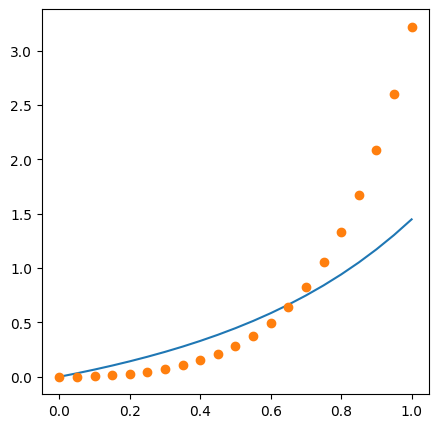

In [38]:
if __name__ == '__main__':
    def f(t: float, y: float) -> float:
        return t*np.exp(3*t) - 2*y 

    df = Adams_Predictor_Corrector(f=f, t_span=[0,1], y_init=0, n=20)

    def y(t):
        return t/4 - 3/16 + (3/16) * np.exp(2*t)

    df.loc[:, 'exact'] = df.loc[:, 't'].apply(y)
    df.loc[:, 'error'] = abs(df.loc[:, 'y'] - df.loc[:, 'exact'])
    print(df)

    fig = plt.figure(figsize=(5, 5))
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(df['t'], df['exact'], '-')
    ax.plot(df['t'], df['y'], 'o')
    plt.show()

# Quiz 6

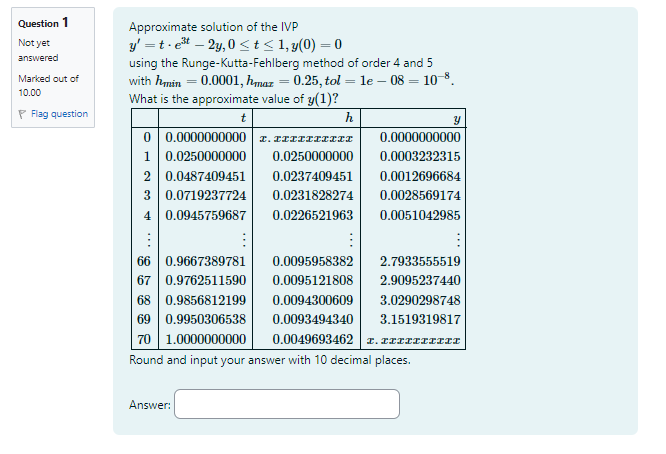

In [39]:
import math

def f(t, y):
    return t * math.exp(3 * t) - 2 * y

def runge_kutta_fehlberg(t0, y0, h, hmin, hmax, tol):
    t = t0
    y = y0

    while t < 1:
        # Calculate the six stages of RKF45
        k1 = h * f(t, y)
        k2 = h * f(t + (1/4) * h, y + (1/4) * k1)
        k3 = h * f(t + (3/8) * h, y + (3/32) * k1 + (9/32) * k2)
        k4 = h * f(t + (12/13) * h, y + (1932/2197) * k1 - (7200/2197) * k2 + (7296/2197) * k3)
        k5 = h * f(t + h, y + (439/216) * k1 - 8 * k2 + (3680/513) * k3 - (845/4104) * k4)
        k6 = h * f(t + (1/2) * h, y - (8/27) * k1 + 2 * k2 - (3544/2565) * k3 + (1859/4104) * k4 - (11/40) * k5)

        # Calculate the fifth-order approximation
        y5 = y + (25/216) * k1 + (1408/2565) * k3 + (2197/4104) * k4 - (1/5) * k5

        # Calculate the fourth-order approximation
        y4 = y + (16/135) * k1 + (6656/12825) * k3 + (28561/56430) * k4 - (9/50) * k5 + (2/55) * k6

        # Calculate the error estimate
        err = abs(y5 - y4)

        # Calculate the safety factor
        safety = 0.9 * (tol / err)**(1/4)

        # If the error is within the tolerance, update y and t
        if err <= tol:
            y = y5
            t = t + h

        # Update the step size h
        h = max(hmin, safety * h)
        if h > hmax:
            h = hmax

        # If t + h exceeds the interval, adjust h accordingly
        if t + h > 1:
            h = 1 - t
    
        print(y)

    return y

# Set the initial conditions and parameters
t0 = 0
y0 = 0
h = 0.25
hmin = 0.0001
hmax = 0.25
tol = 1e-08

# Approximate the value of y(1)
y_approx = runge_kutta_fehlberg(t0, y0, h, hmin, hmax, tol)

# Print the approximate value of y(1)
print(round(y_approx, 10))


0
0.0005254256831298267
0.0005254256831298267
0.0036306509666414457
0.010569965669715053
0.02127313864588088
0.03636332109219392
0.05622208368678092
0.08137455068067152
0.1123541119514821
0.14974516637967208
0.19416952103354845
0.2462901917625594
0.3068102878639625
0.37647351049374145
0.4560643448794703
0.5464084625410676
0.6483731605937978
0.7628678707331165
0.8908447104562475
1.0332990694472368
1.191270228544546
1.3658419878341628
1.5581433482439733
1.7693491541846578
2.0006808061110424
2.253406932690908
2.528844099257434
2.828357528201194
3.153361779307235
3.219099210756693
3.2190992108


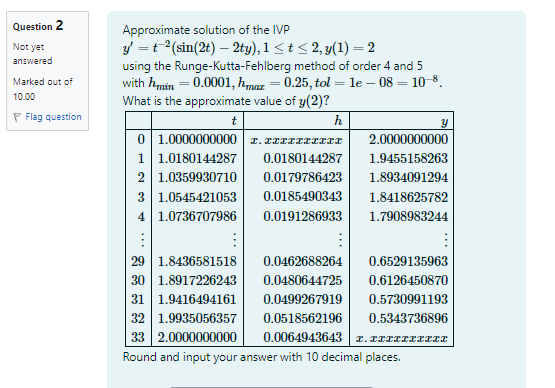